# FEMA Group Project: EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
df = pd.read_csv('./CSVs/final_data.csv')

In [3]:
df.shape

(338, 40)

In [4]:
df.head(2)

Unnamed: 0  county      target  .25_acres_or_<_num_fire_size  \
0         237    Lake  2017984089                            42   
1         225  Amador  1000000709                            28   

   av_ac_brn_0.125  .26-9.99_acres_num_fire_size  av_ac_brn_8.865  \
0             5.25                            26          126.490   
1             3.50                            17           82.705   

   10-99_acres_num_fire_size  av_ac_brn_44.5  100-299_acres_num_fire_size  \
0                          2            89.0                            1   
1                          0             0.0                            0   

   ...  Unnamed: 30  tot_ac_brn  tot_ac_brn_half  tot_num_fire  \
0  ...          NaN        1700            850.0            47   
1  ...          NaN          84             42.0            41   

   tot_av_ac_brn.1        pop   area  pop_dense  forest_acr  \
0           854.49  1663190.0  738.0    2253.64   103910.40   
1           120.60    38626.0  606.0      63.74   137270.18   

   percent_forest_acr  
0                0.22  
1                0.35  

[2 rows x 40 columns]

In [5]:
df = df.drop(['Unnamed: 0', 'Unnamed: 30'], axis=1)
df.head(2)

county      target  .25_acres_or_<_num_fire_size  av_ac_brn_0.125  \
0    Lake  2017984089                            42             5.25   
1  Amador  1000000709                            28             3.50   

   .26-9.99_acres_num_fire_size  av_ac_brn_8.865  10-99_acres_num_fire_size  \
0                            26          126.490                          2   
1                            17           82.705                          0   

   av_ac_brn_44.5  100-299_acres_num_fire_size  av_ac_brn_99.5  ...  \
0            89.0                            1            99.5  ...   
1             0.0                            0             0.0  ...   

   amt_forest  tot_ac_brn  tot_ac_brn_half  tot_num_fire  tot_av_ac_brn.1  \
0         2.0        1700            850.0            47           854.49   
1         4.0          84             42.0            41           120.60   

         pop   area  pop_dense  forest_acr  percent_forest_acr  
0  1663190.0  738.0    2253.64   103910.40                0.22  
1    38626.0  606.0      63.74   137270.18                0.35  

[2 rows x 38 columns]

In [6]:
df.isnull().sum().sum()

145

In [7]:
df.isnull().sum()[df.isnull().sum()!= 0]

val_sf                52
snow                   1
num_camps             16
amt_forest            16
pop                   14
area                  14
pop_dense             14
forest_acr             9
percent_forest_acr     9
dtype: int64

In [8]:
df.describe().T

count          mean           std       min  \
target                         338.0  9.760690e+06  1.224442e+08      0.00   
.25_acres_or_<_num_fire_size   338.0  3.371893e+01  3.460332e+01      0.00   
av_ac_brn_0.125                338.0  4.214867e+00  4.325415e+00      0.00   
.26-9.99_acres_num_fire_size   338.0  2.446746e+01  2.199084e+01      0.00   
av_ac_brn_8.865                338.0  1.190342e+02  1.069854e+02      0.00   
10-99_acres_num_fire_size      338.0  3.136095e+00  3.484489e+00      0.00   
av_ac_brn_44.5                 338.0  1.395562e+02  1.550597e+02      0.00   
100-299_acres_num_fire_size    338.0  6.213018e-01  1.021325e+00      0.00   
av_ac_brn_99.5                 338.0  6.181953e+01  1.016219e+02      0.00   
300-999_acres_num_fire_size    338.0  2.573964e-01  5.932521e-01      0.00   
av_ac_brn_349.5                338.0  8.996006e+01  2.073416e+02      0.00   
1000-4999_acres_num_fire_size  338.0  1.479290e-01  4.098330e-01      0.00   
av_ac_brn_1999.5               338.0  2.957840e+02  8.194610e+02      0.00   
5000_acres_>_num_fire_size     338.0  9.171598e-02  3.451951e-01      0.00   
av_ac_brn_5000                 338.0  4.437870e+02  1.664280e+03      0.00   
tot_av_ac_brn                  338.0  1.154156e+03  2.169467e+03      0.00   
year                           338.0  2.030926e+03  3.288086e+02      0.00   
val_sf                         286.0  1.873596e+02  1.015854e+02      0.00   
per_cap_income                 338.0  2.663468e+04  6.718859e+03  16409.00   
med_house_income               338.0  5.415254e+04  1.350952e+04  35997.00   
med_fam_income                 338.0  6.480357e+04  1.559252e+04  45296.00   
awnd                           338.0  5.736818e+00  1.273100e+00      1.80   
prcp                           338.0  2.486592e+01  1.700523e+01      2.17   
snow                           337.0  1.592000e+01  4.022705e+01      0.00   
tavg                           338.0  5.820847e+01  5.084391e+00     44.91   
tmax                           338.0  7.037169e+01  5.568452e+00     57.05   
num_camps                      322.0  4.701863e+01  2.198441e+01      2.00   
amt_forest                     322.0  2.301242e+00  1.194196e+00      1.00   
tot_ac_brn                     338.0  6.060527e+03  2.884168e+04      0.00   
tot_ac_brn_half                338.0  3.030263e+03  1.442084e+04      0.00   
tot_num_fire                   338.0  6.250296e+01  5.401183e+01      0.00   
tot_av_ac_brn.1                338.0  1.154156e+03  2.169467e+03      0.00   
pop                            324.0  4.855665e+05  7.354031e+05   1120.00   
area                           324.0  2.795090e+03  3.250940e+03     47.00   
pop_dense                      324.0  3.642564e+02  1.156223e+03      1.52   
forest_acr                     329.0  6.414812e+05  7.757311e+05   3091.20   
percent_forest_acr             329.0  3.917021e-01  3.279670e-01      0.01   

                                       25%          50%           75%  \
target                           3906.2500   41726.0000  276251.25000   
.25_acres_or_<_num_fire_size        8.0000      23.0000      49.75000   
av_ac_brn_0.125                     1.0000       2.8750       6.21875   
.26-9.99_acres_num_fire_size        7.0000      19.0000      35.00000   
av_ac_brn_8.865                    34.0550      92.4350     170.27500   
10-99_acres_num_fire_size           0.2500       2.0000       5.00000   
av_ac_brn_44.5                     11.1250      89.0000     222.50000   
100-299_acres_num_fire_size         0.0000       0.0000       1.00000   
av_ac_brn_99.5                      0.0000       0.0000      99.50000   
300-999_acres_num_fire_size         0.0000       0.0000       0.00000   
av_ac_brn_349.5                     0.0000       0.0000       0.00000   
1000-4999_acres_num_fire_size       0.0000       0.0000       0.00000   
av_ac_brn_1999.5                    0.0000       0.0000       0.00000   
5000_acres_>_num_fire_size          0.0000  

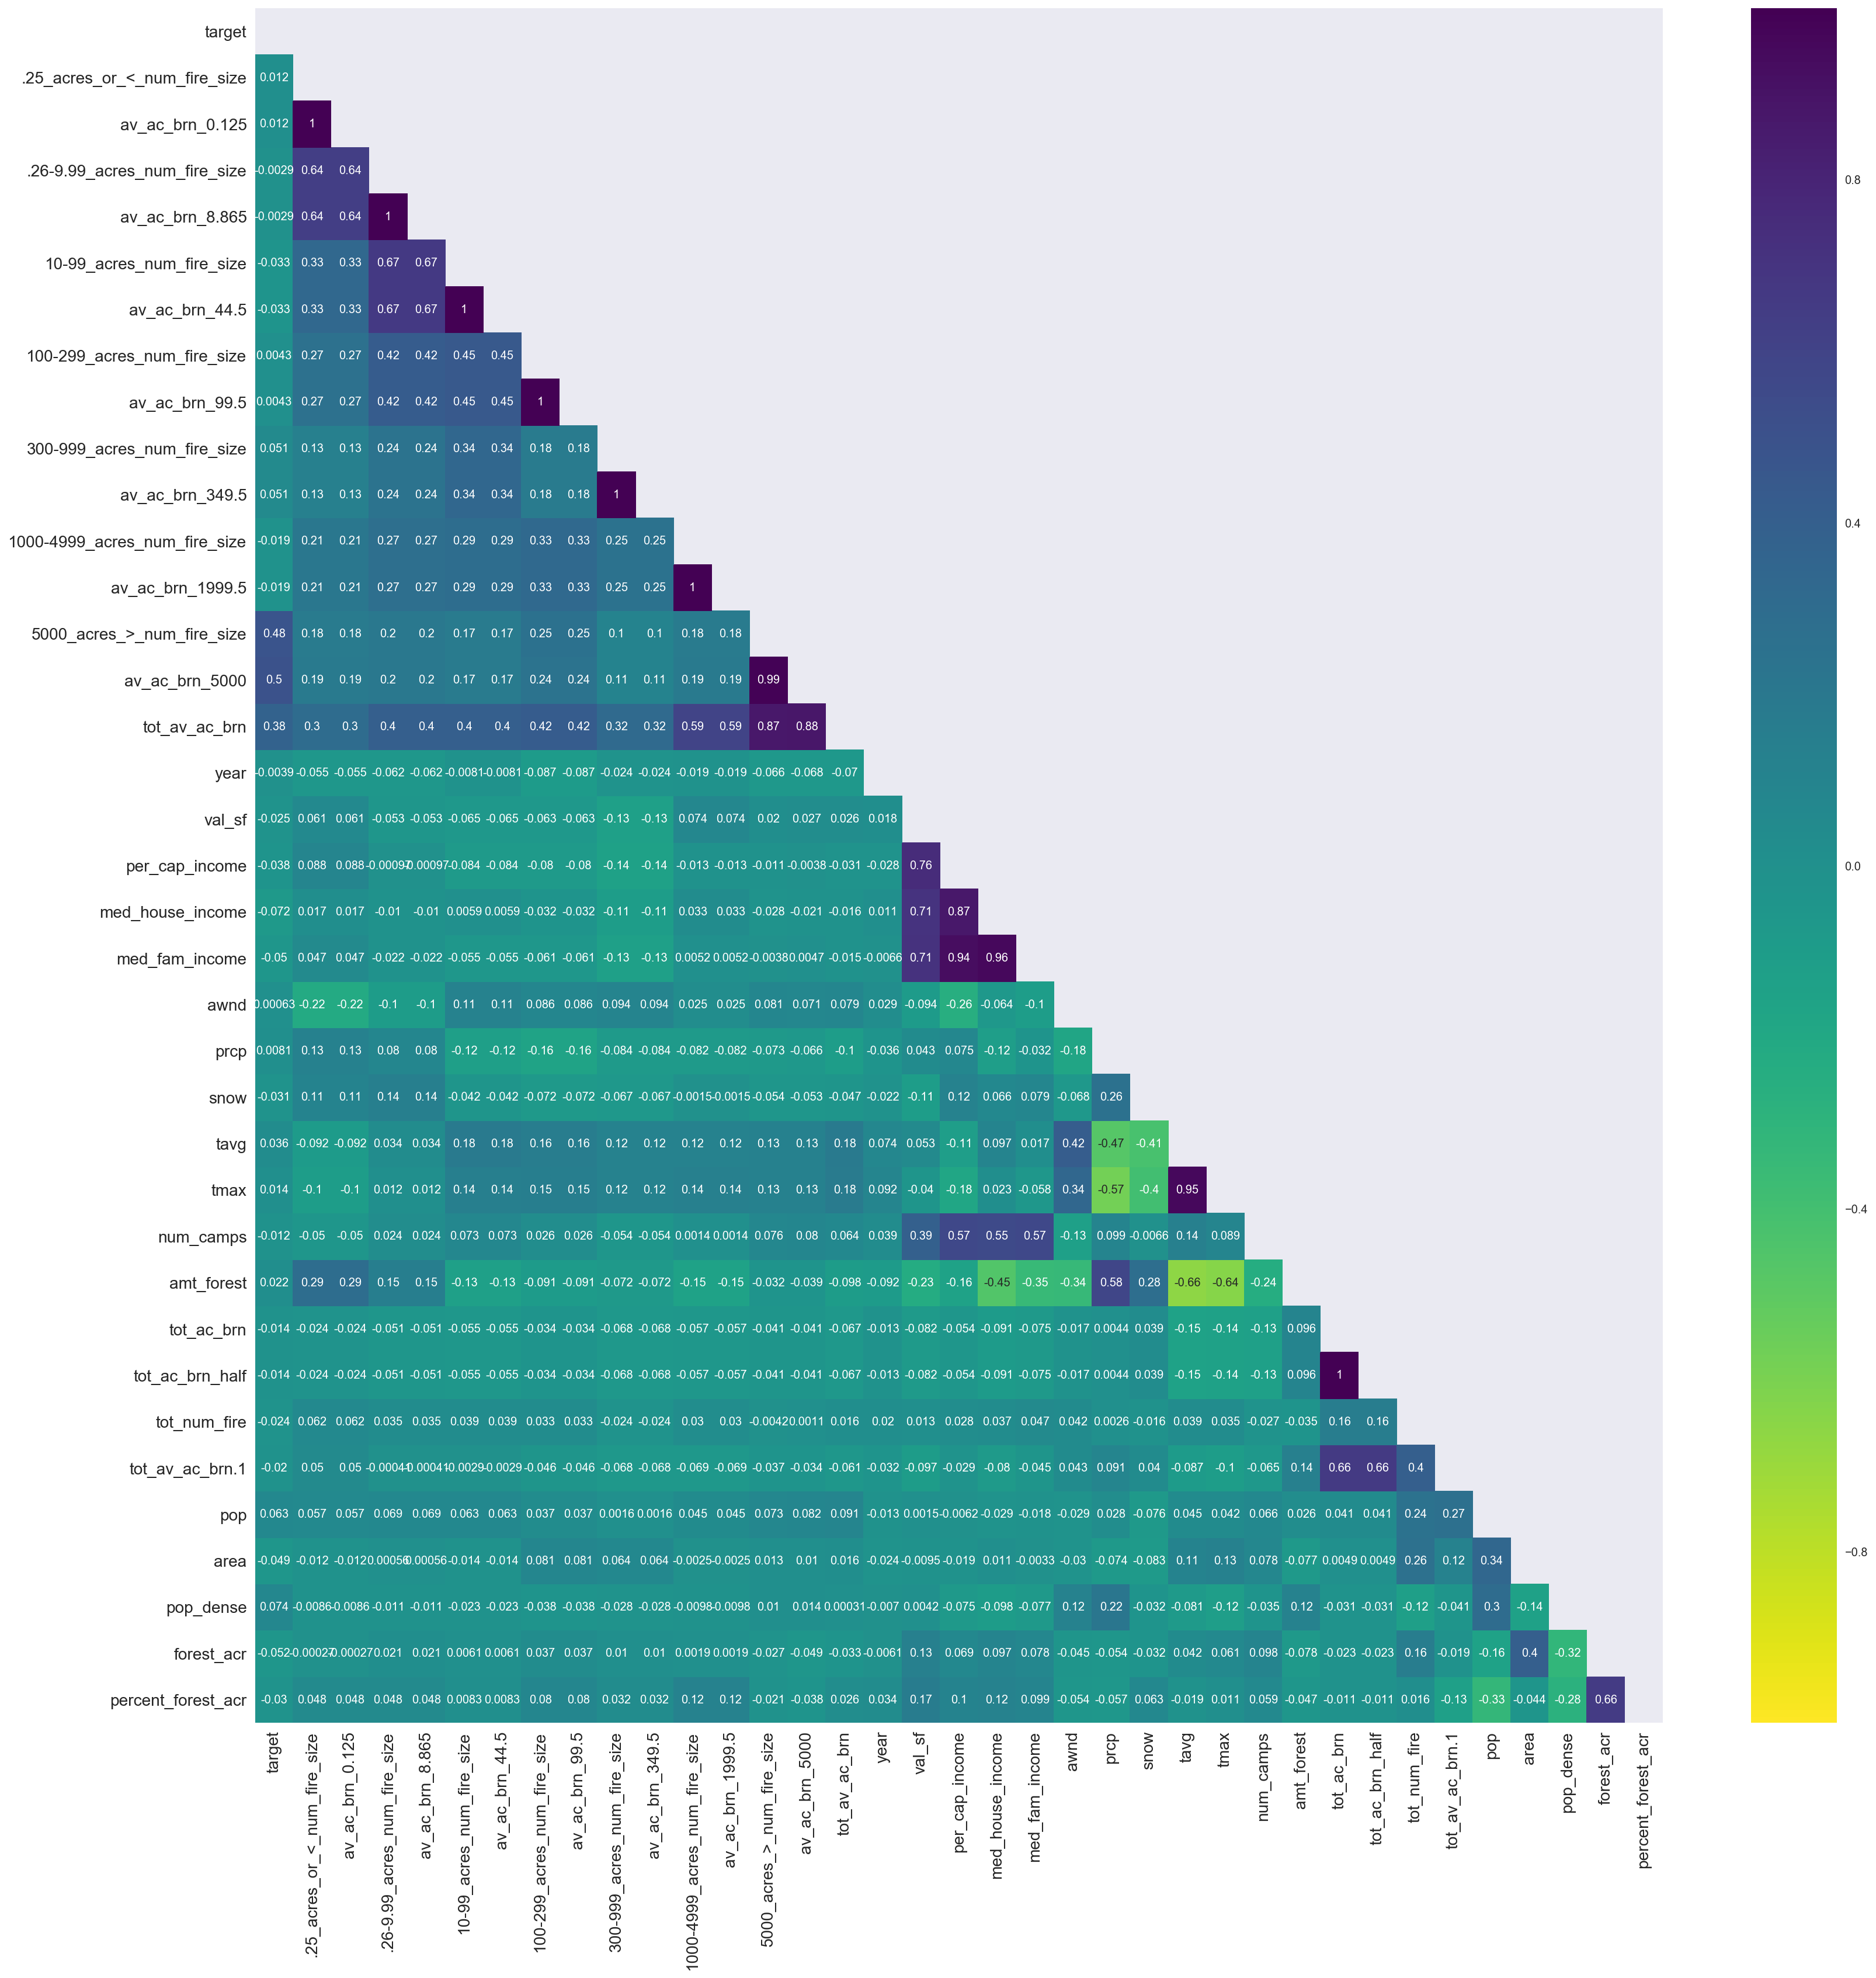

In [9]:
#overexhaustive heatmap to identify potential features correlated with target
fix, ax = plt.subplots(figsize=(27,27))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df.corr(), mask=mask, ax=ax, cmap='viridis_r', annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14);

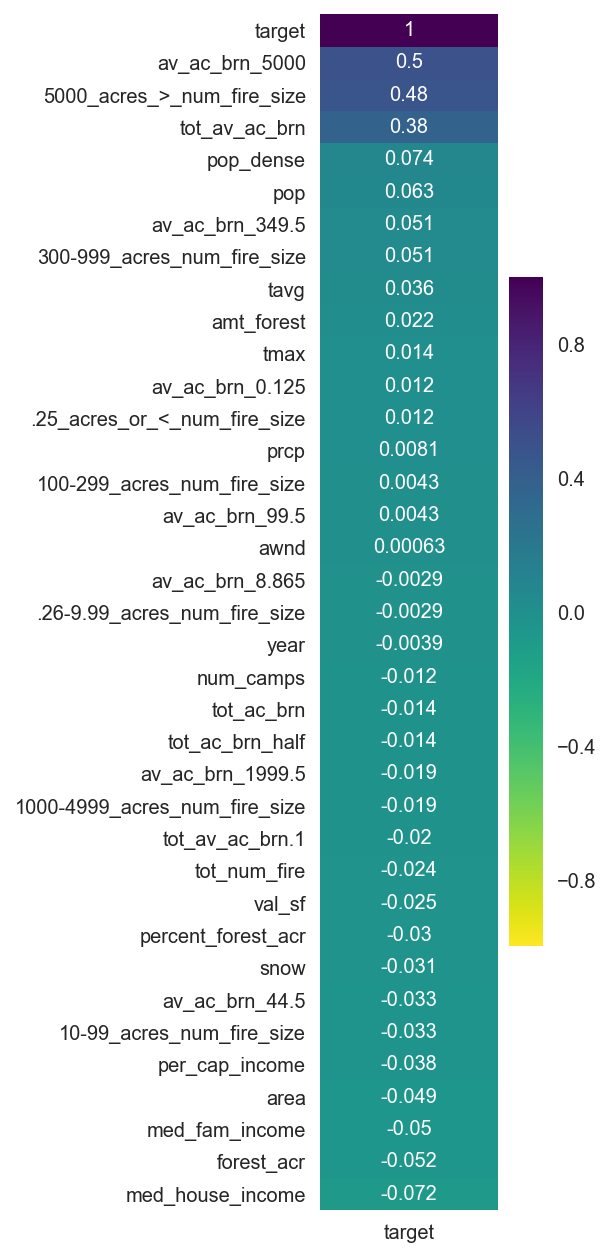

In [10]:
#heatmap to specifically sort correlations to target only
fix, ax = plt.subplots(figsize=(2,11))
sns.heatmap(df.corr()[['target']].sort_values('target', ascending=False), annot=True, cmap='viridis_r')

/Users/amandajo/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/amandajo/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


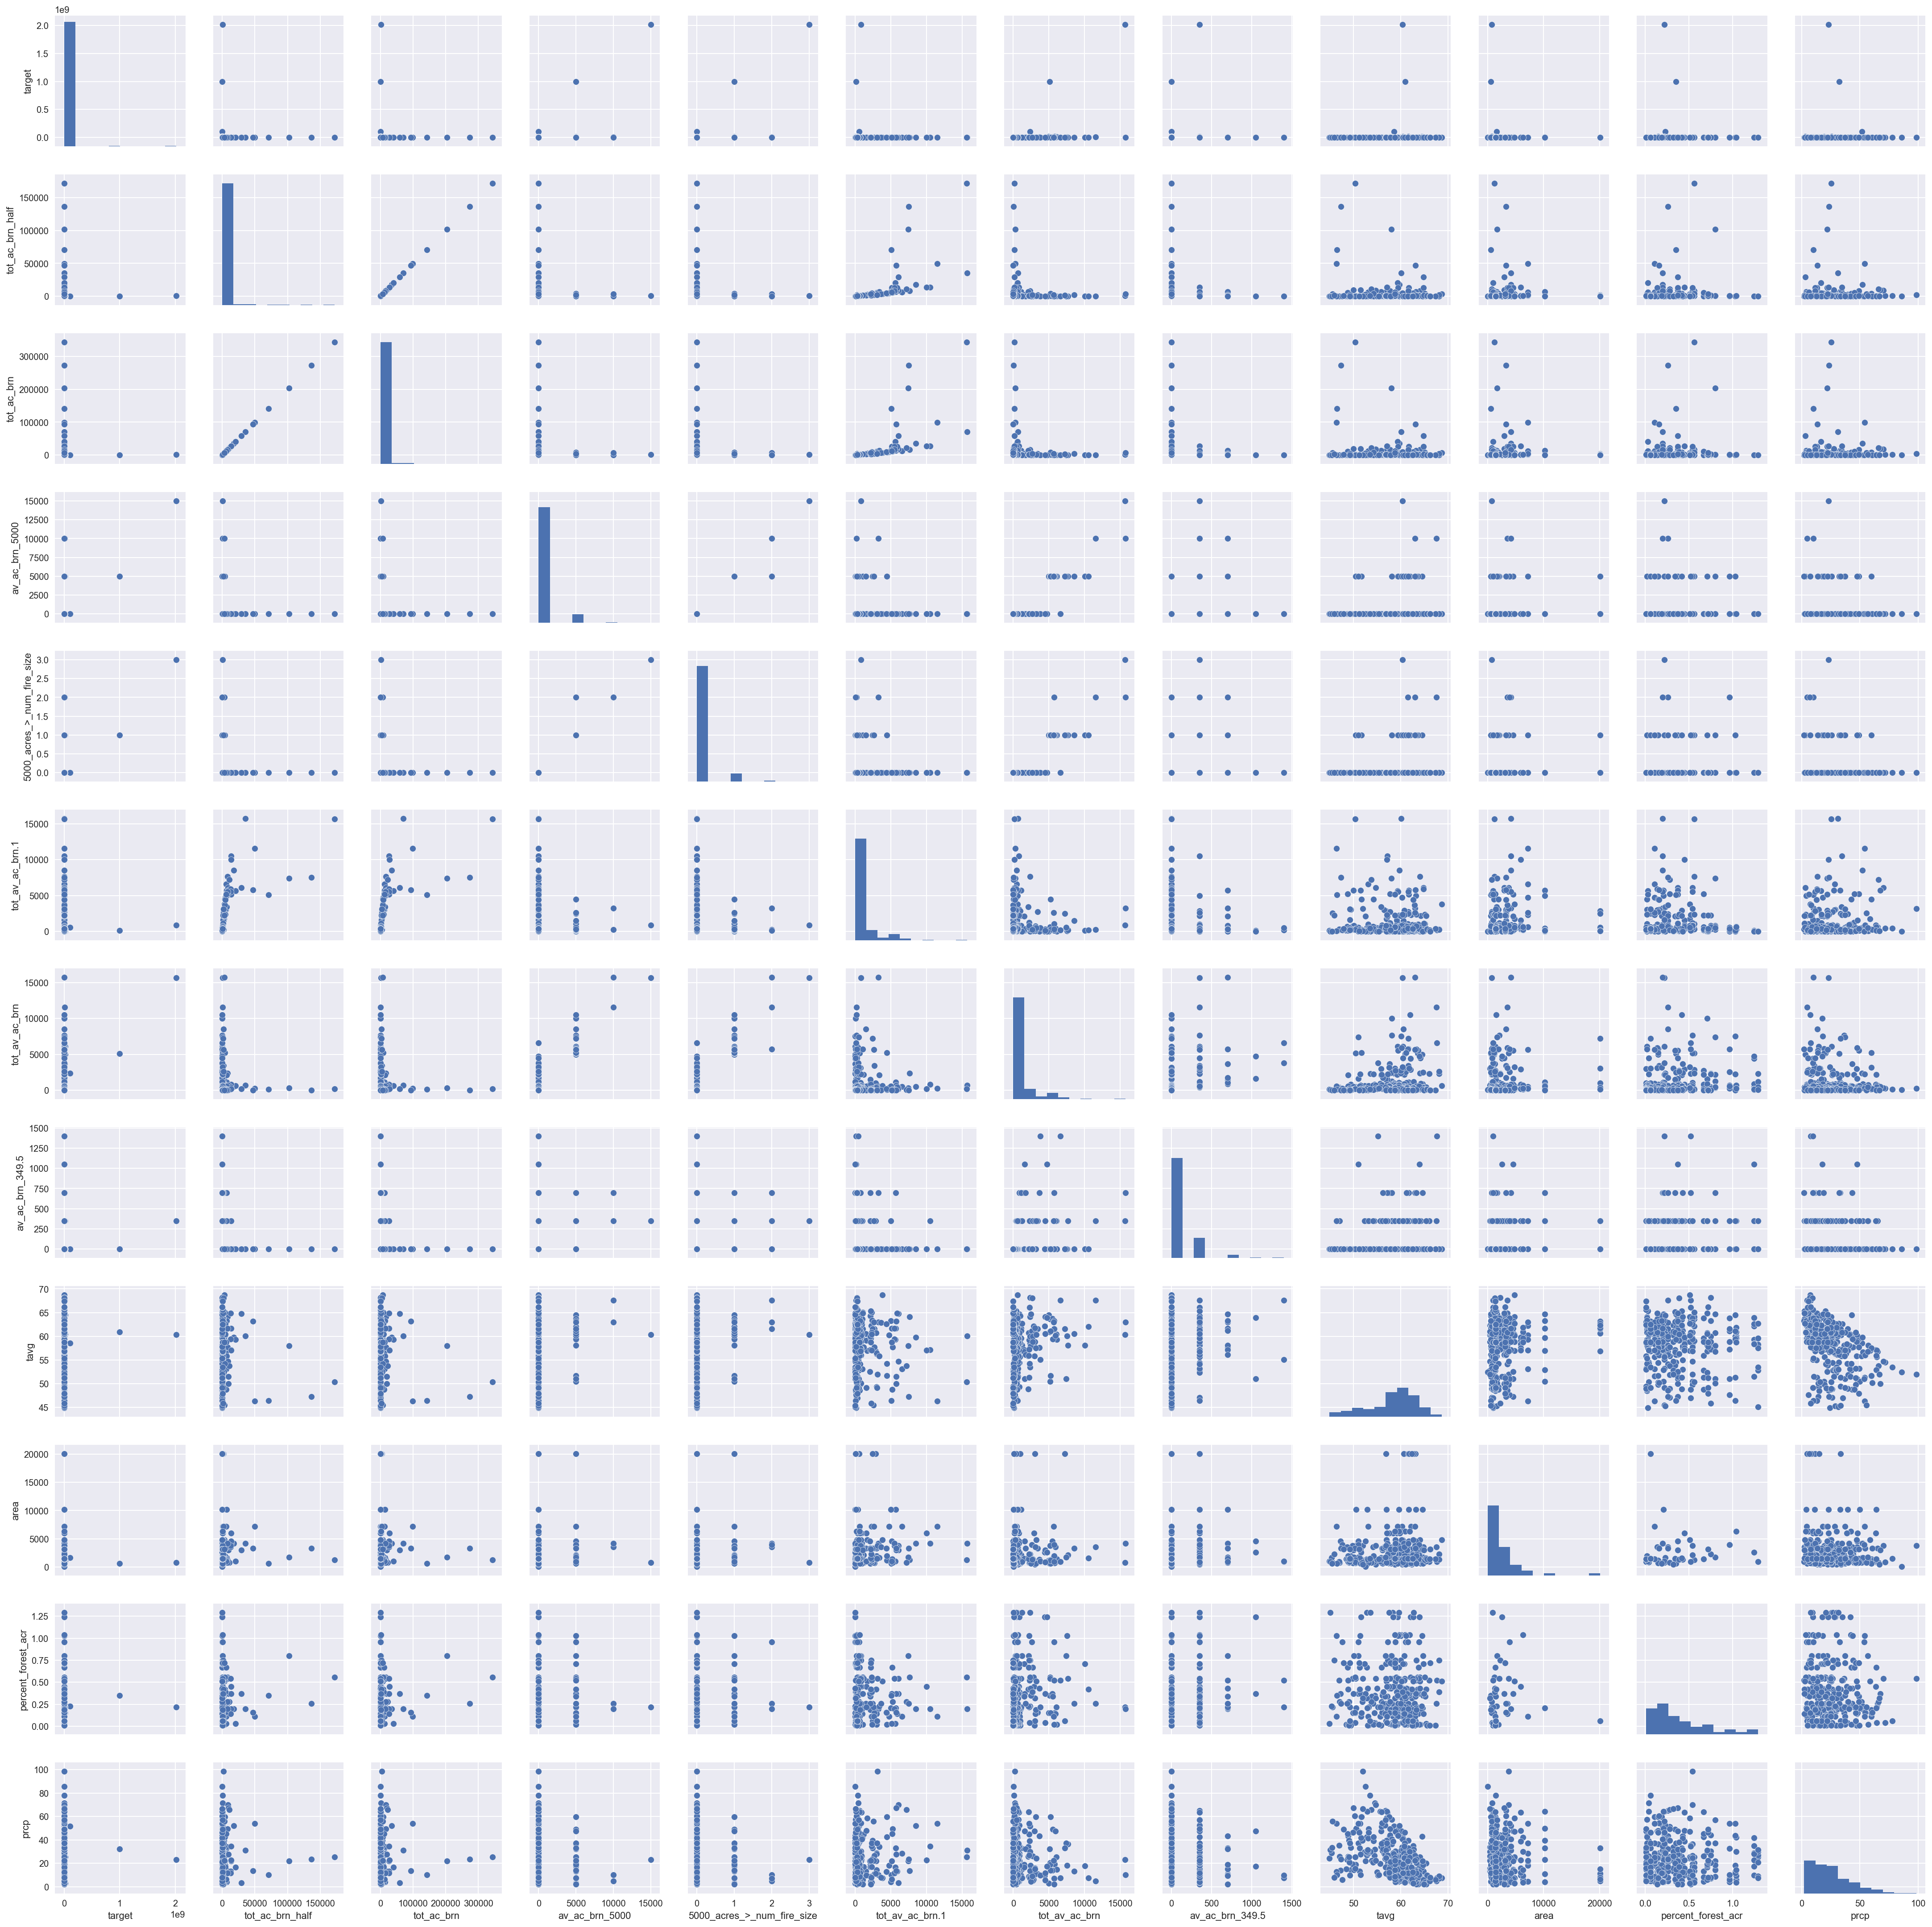

In [11]:
sns.pairplot(df[['target', 
                 'tot_ac_brn_half', 
                 'tot_ac_brn', 
                 'av_ac_brn_5000', 
                 '5000_acres_>_num_fire_size', 
                 'tot_av_ac_brn.1', 
                 'tot_av_ac_brn', 
                 'av_ac_brn_349.5',
                 'tavg',
                 'area',
                 'percent_forest_acr',
                 'prcp', 
                 ]])

/Users/amandajo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


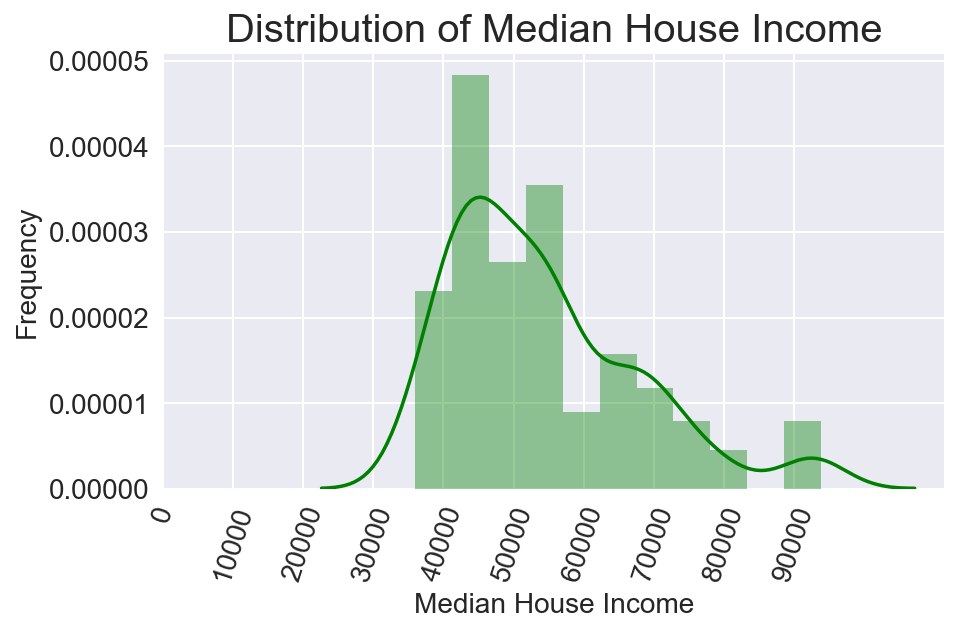

In [12]:
plt.figure(figsize=(7, 4))
sns.distplot(df[['med_house_income']], color='g')
plt.yticks(fontsize=14);
plt.xticks(np.arange(0, 100_000, step=10000), rotation=72, fontsize=14);
plt.title('Distribution of Median House Income', fontsize=20)
plt.xlabel('Median House Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

/Users/amandajo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


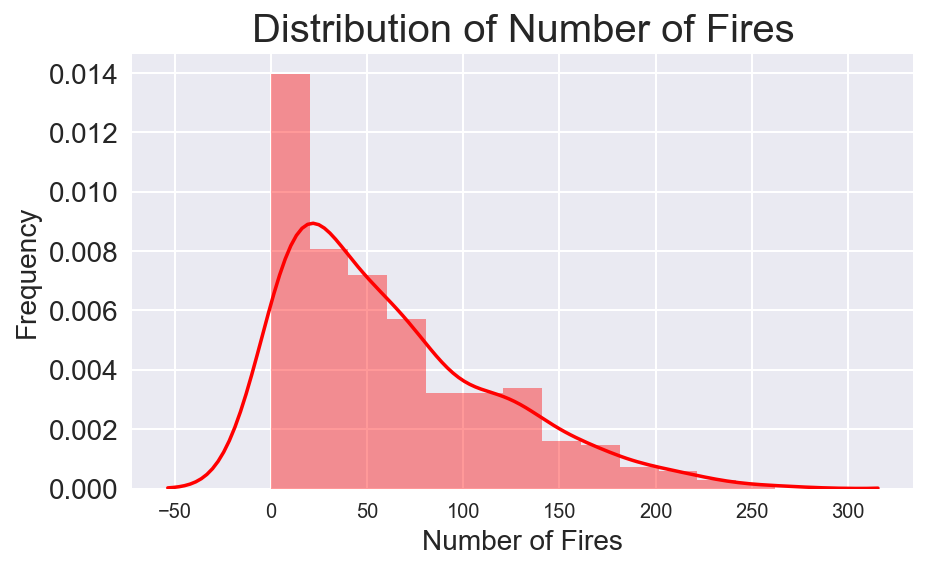

In [13]:
plt.figure(figsize=(7, 4))
sns.distplot(df[['tot_num_fire']], color='red')
plt.yticks(fontsize=14);
plt.title('Distribution of Number of Fires', fontsize=20)
plt.xlabel('Number of Fires', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

/Users/amandajo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/amandajo/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/amandajo/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


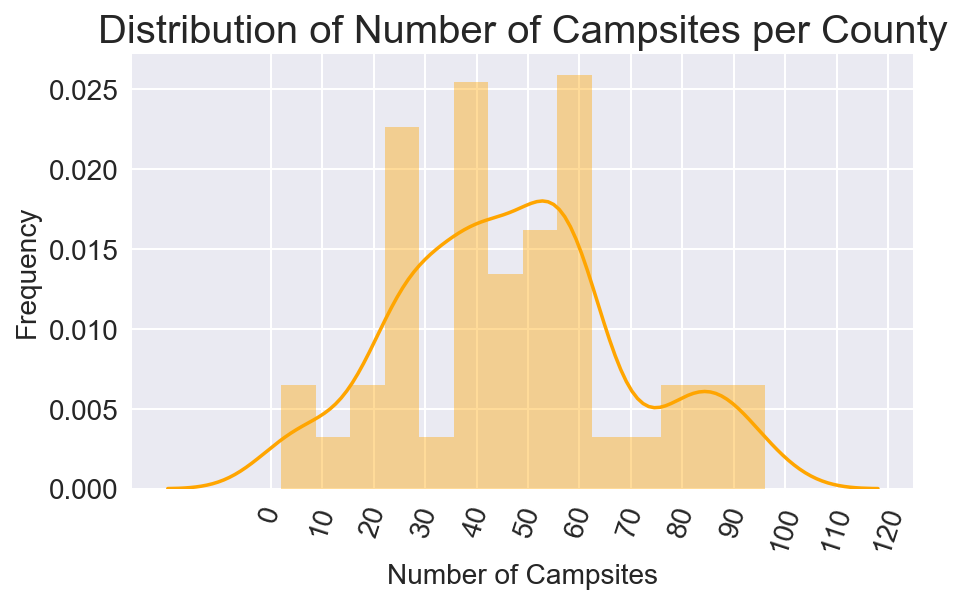

In [14]:
plt.figure(figsize=(7, 4))
sns.distplot(df[['num_camps']], color='orange', bins=14)
plt.yticks(fontsize=14);
plt.xticks(np.arange(0, 130, step=10), rotation=72, fontsize=14);
plt.title('Distribution of Number of Campsites per County', fontsize=20)
plt.xlabel('Number of Campsites', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

/Users/amandajo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


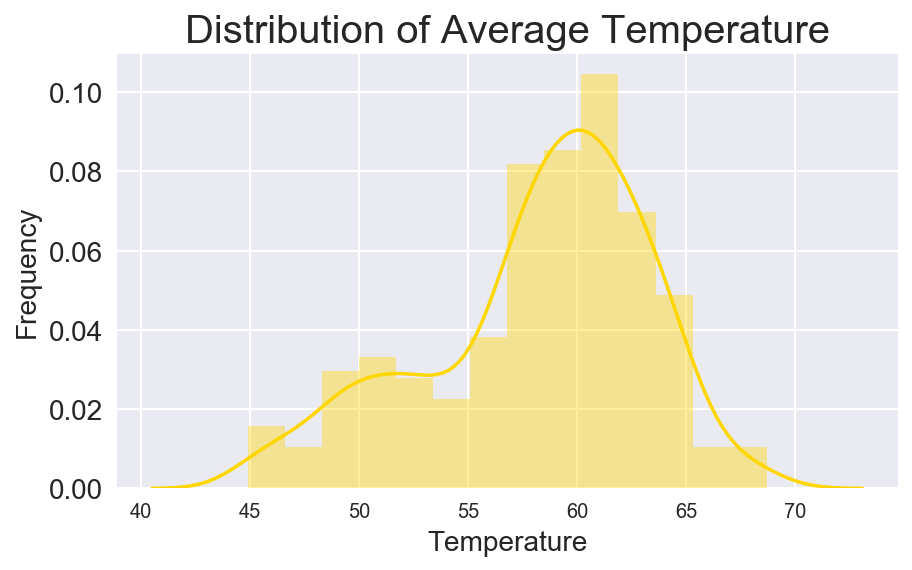

In [15]:
plt.figure(figsize=(7, 4))
sns.distplot(df[['tavg']], color='gold')
plt.yticks(fontsize=14);
# plt.xticks(np.arange(0, 350_000, step=10000), rotation=72, fontsize=14);
plt.title('Distribution of Average Temperature', fontsize=20)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

/Users/amandajo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


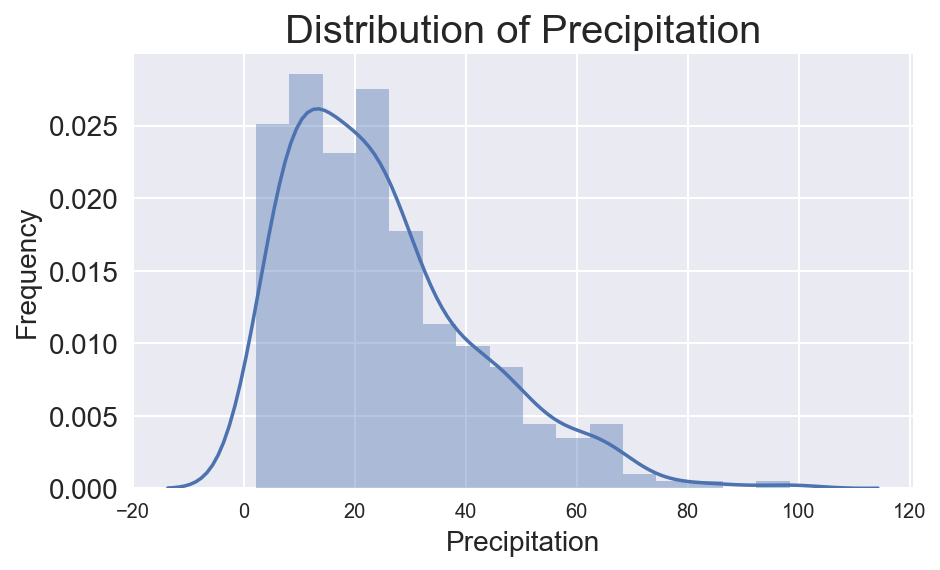

In [16]:
plt.figure(figsize=(7, 4))
sns.distplot(df[['prcp']])
plt.yticks(fontsize=14);
plt.title('Distribution of Precipitation', fontsize=20)
plt.xlabel('Precipitation', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

/Users/amandajo/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


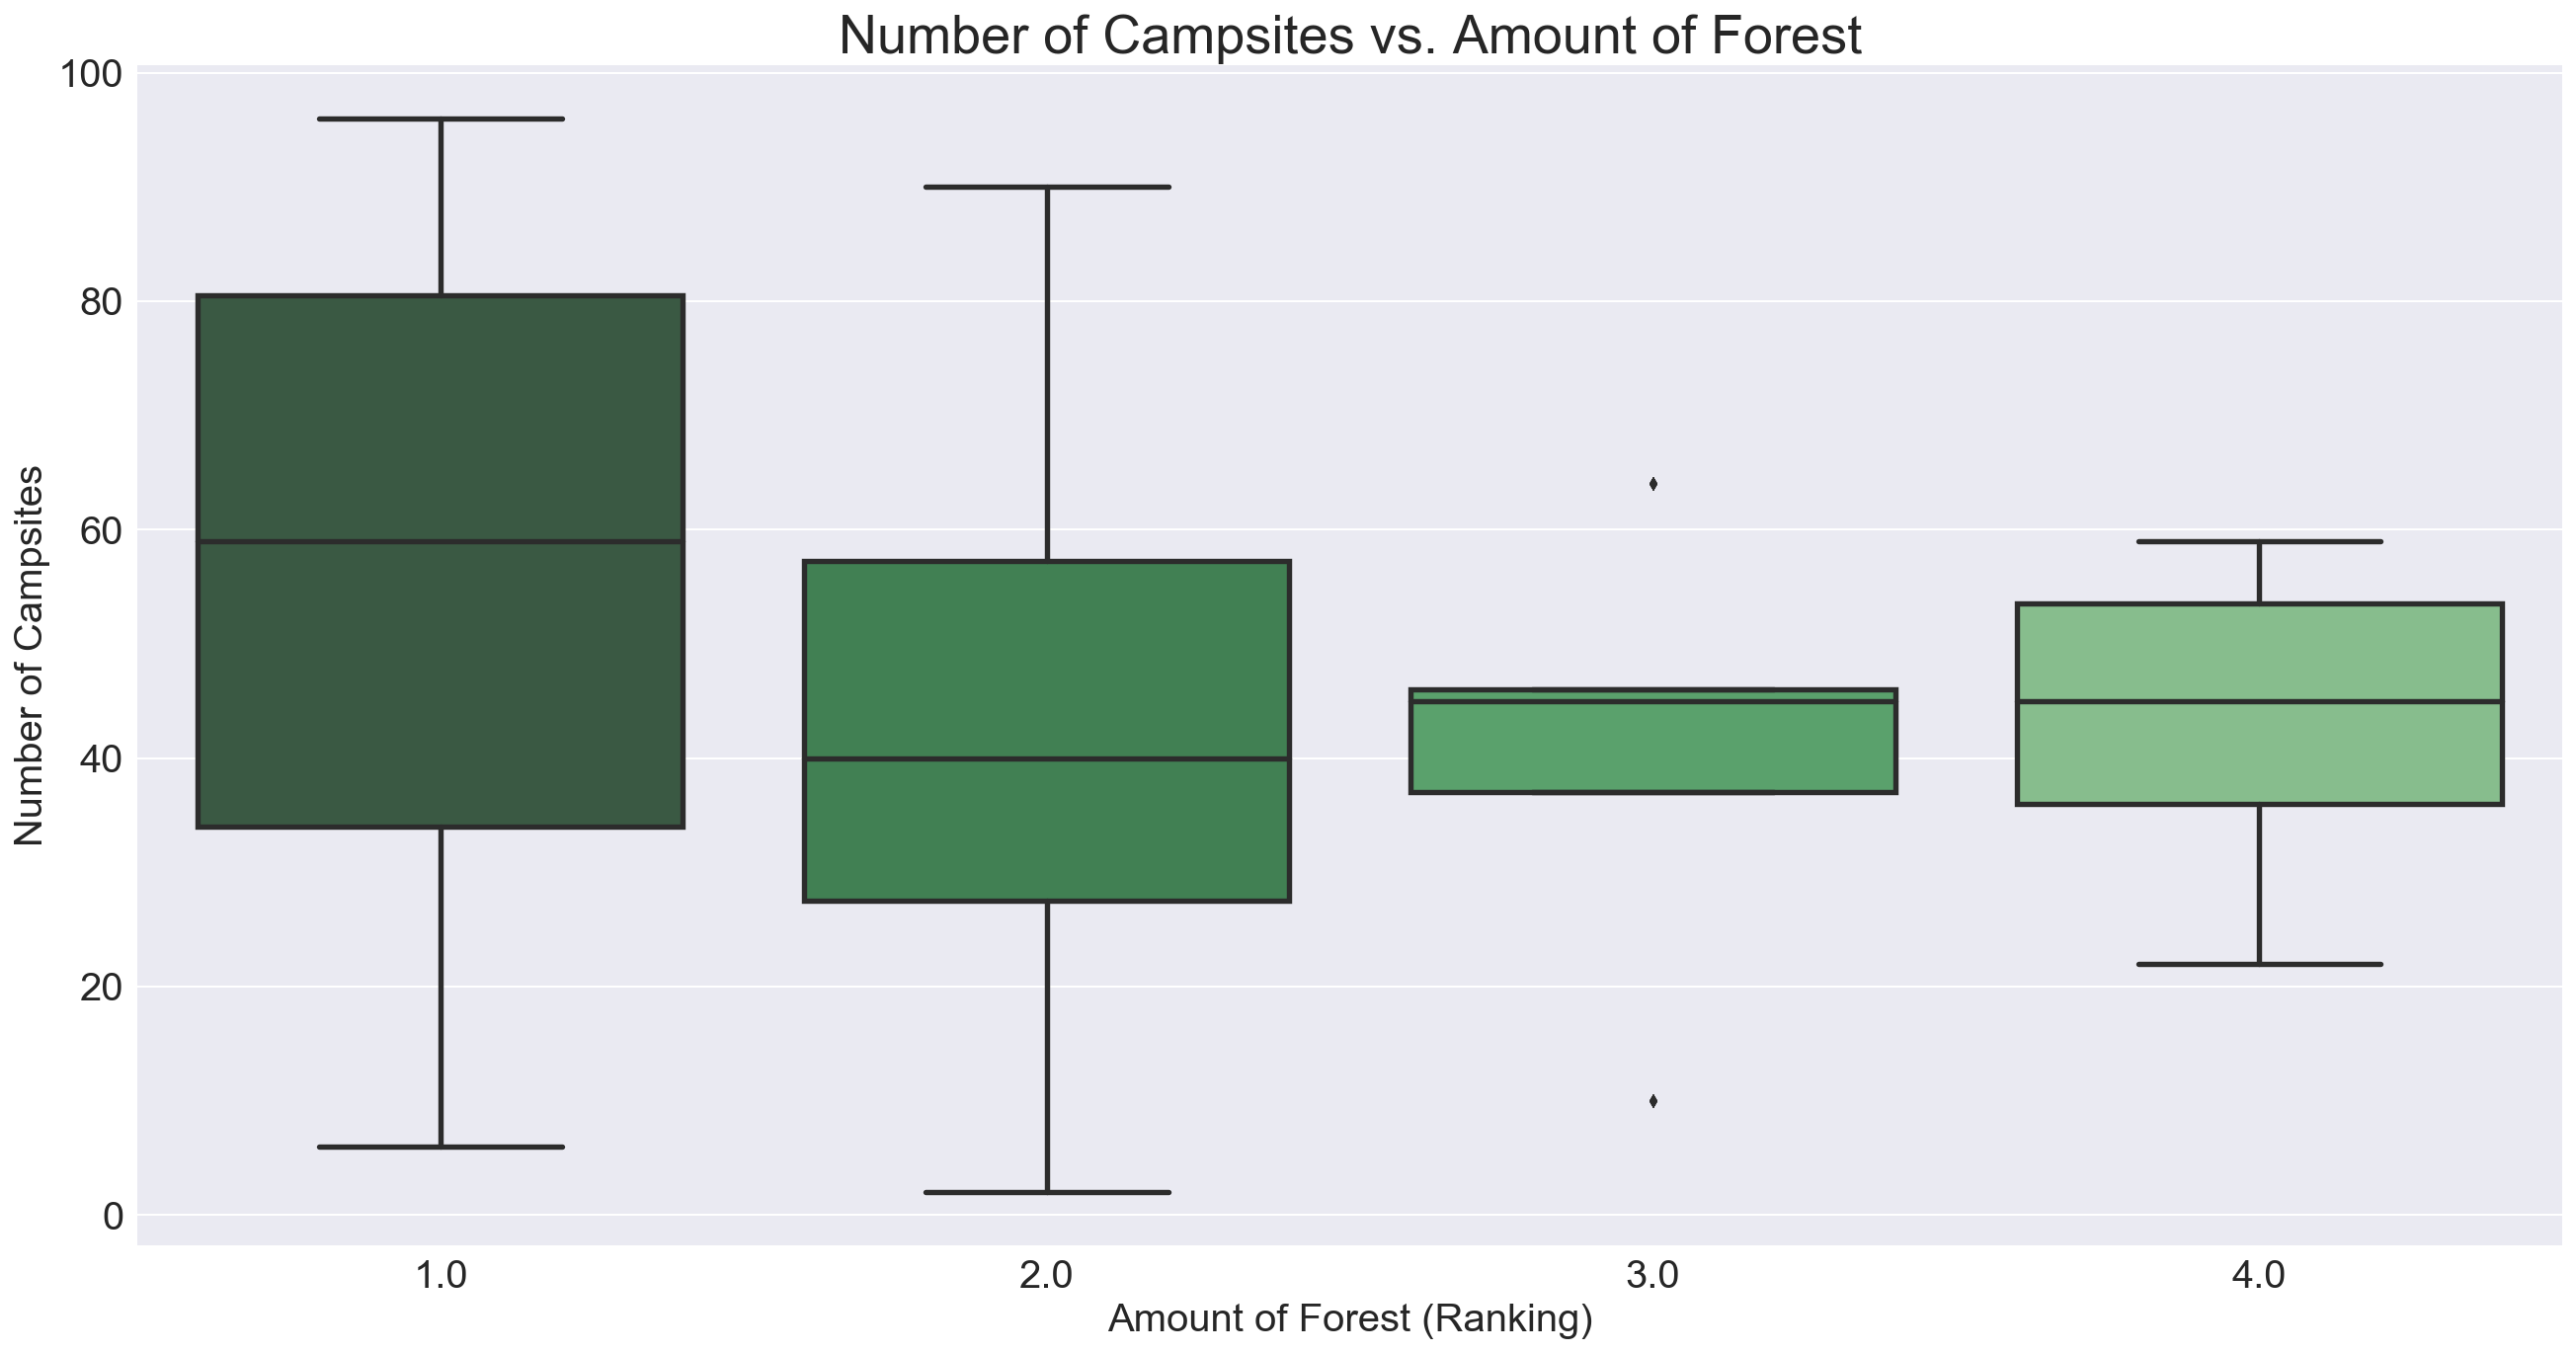

In [17]:
plt.figure(figsize=(22, 11))
sns.boxplot(x='amt_forest', y="num_camps", data=df, palette="Greens_d",  linewidth=2.7);
plt.yticks(fontsize=20);
plt.xticks(fontsize=20);
plt.title('Number of Campsites vs. Amount of Forest', fontsize=27)
plt.xlabel('Amount of Forest (Ranking)', fontsize=20)
plt.ylabel('Number of Campsites', fontsize=20);

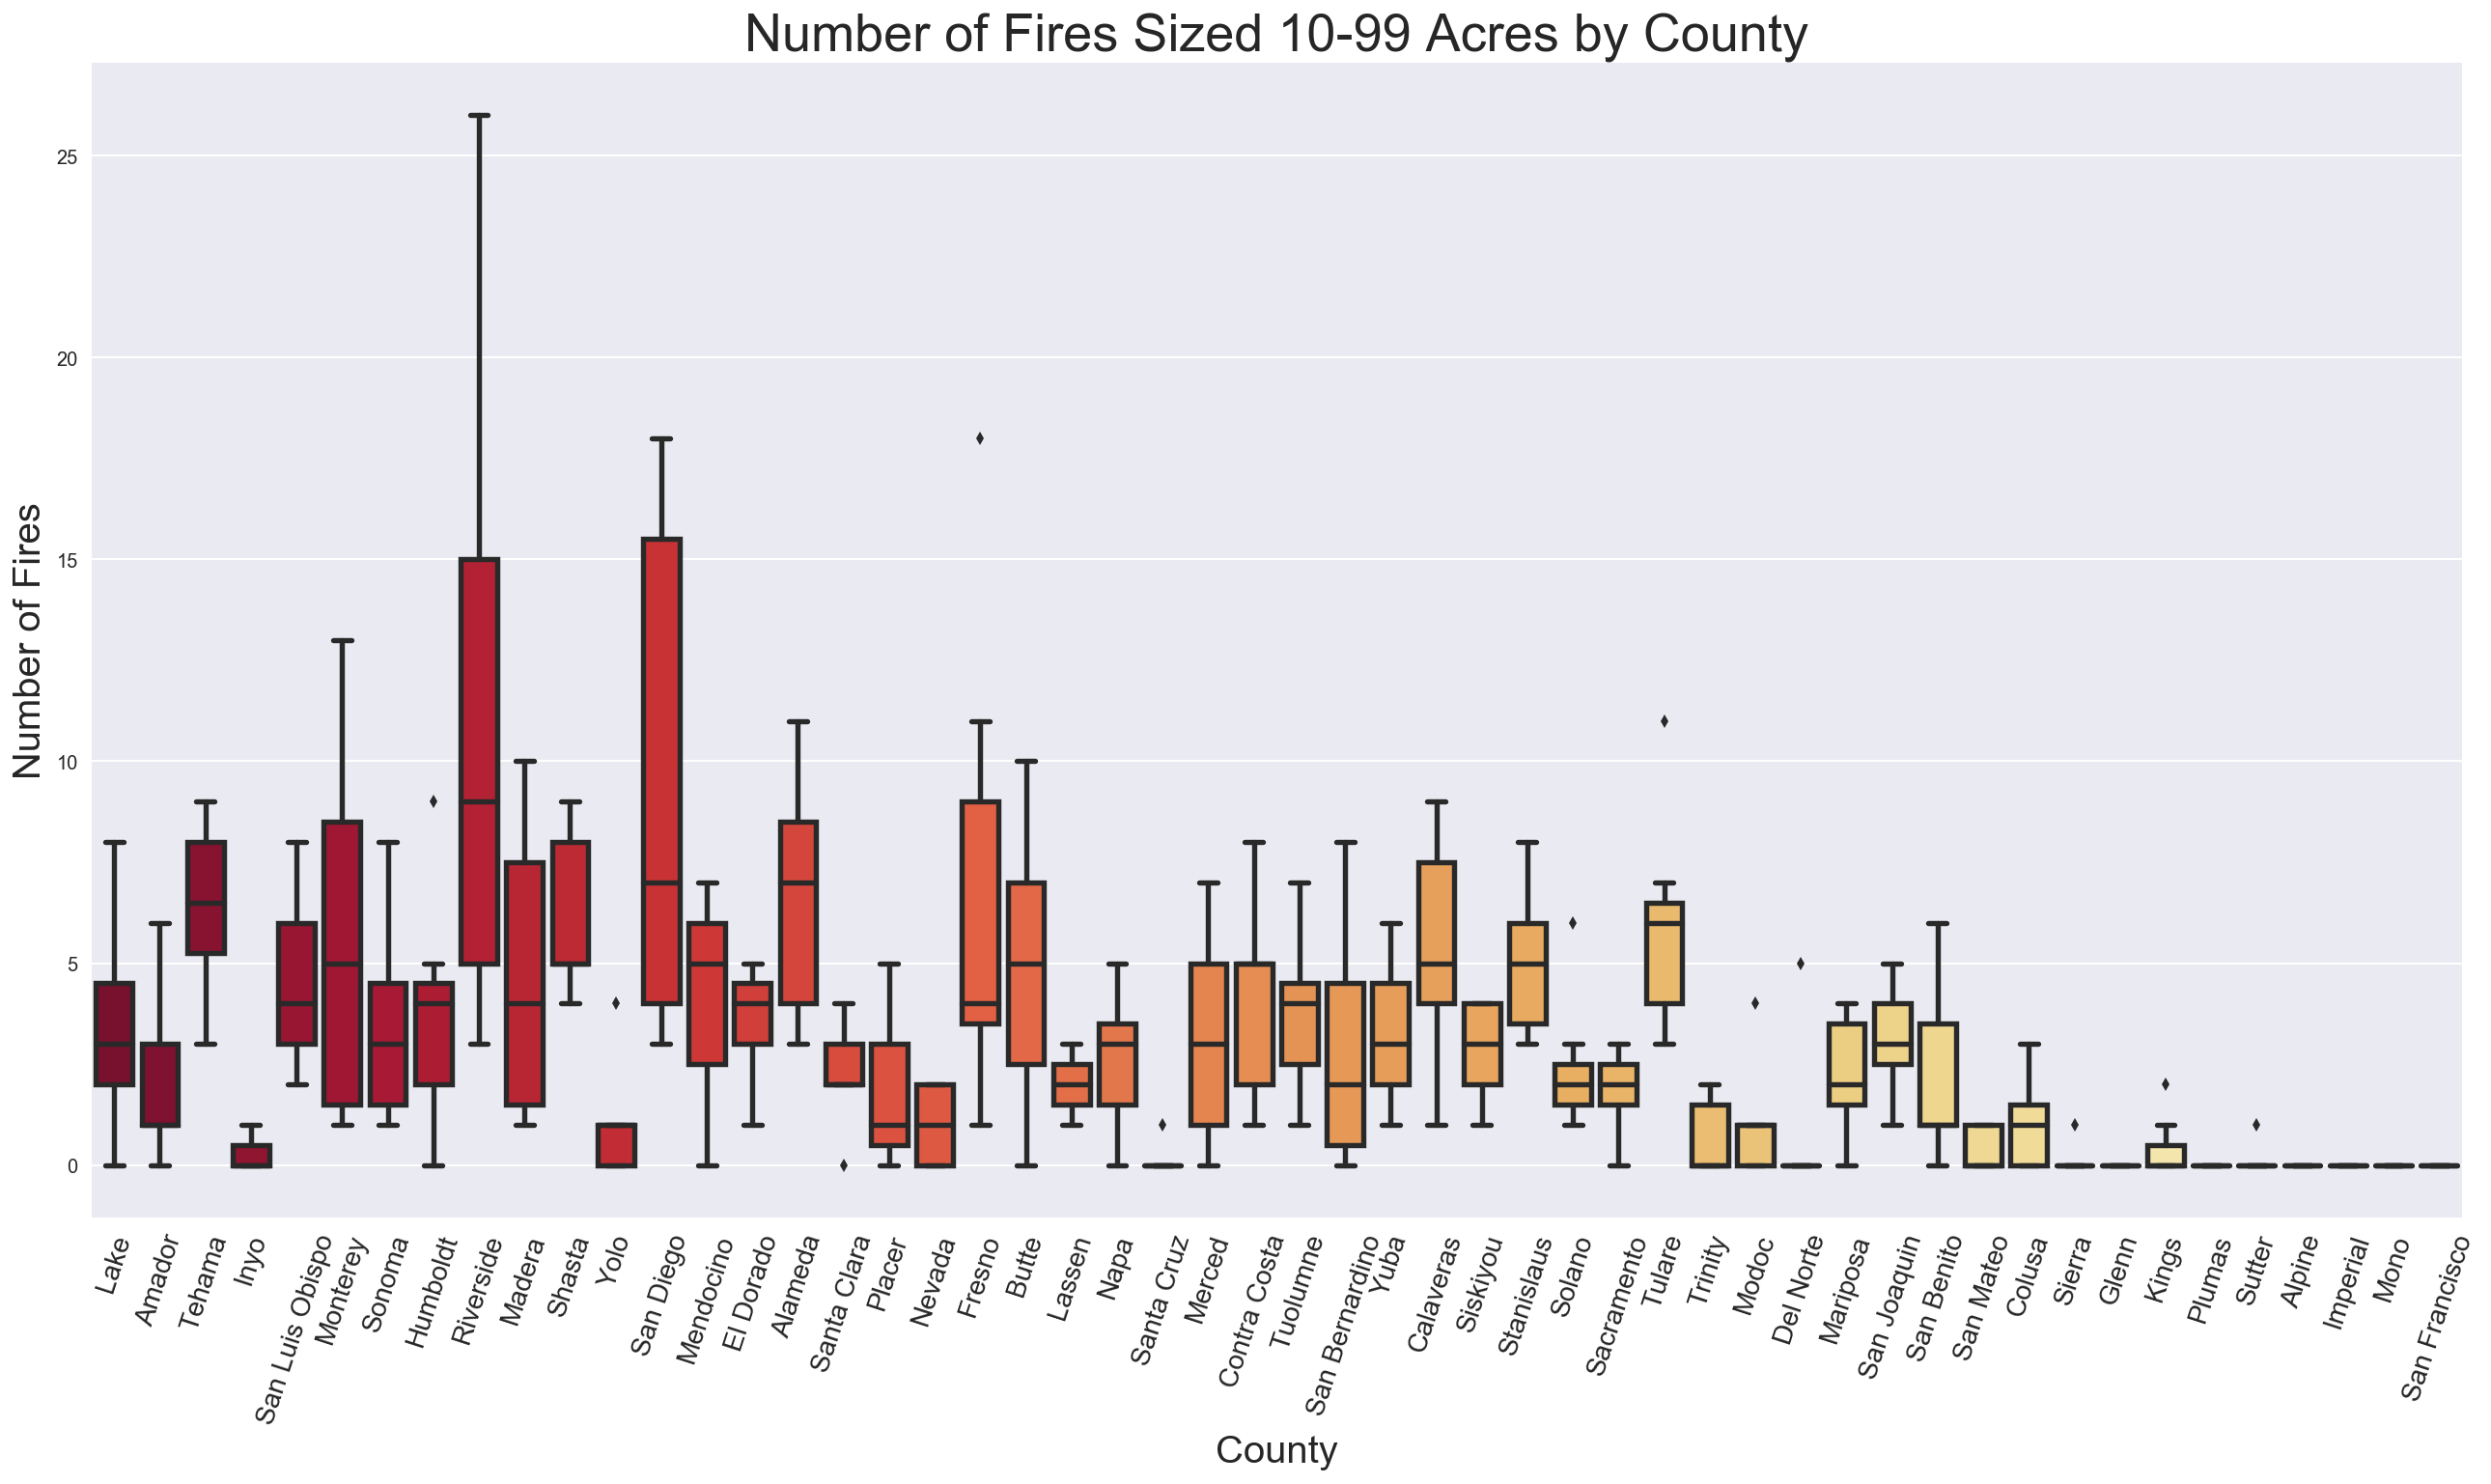

In [18]:
plt.figure(figsize=(22, 11))
sns.boxplot(x='county', y="10-99_acres_num_fire_size", data=df, palette="YlOrRd_r",  linewidth=2.7);
plt.xticks(rotation=72, fontsize=14);
plt.title('Number of Fires Sized 10-99 Acres by County', fontsize=27)
plt.xlabel('County', fontsize=20)
plt.ylabel('Number of Fires', fontsize=20);

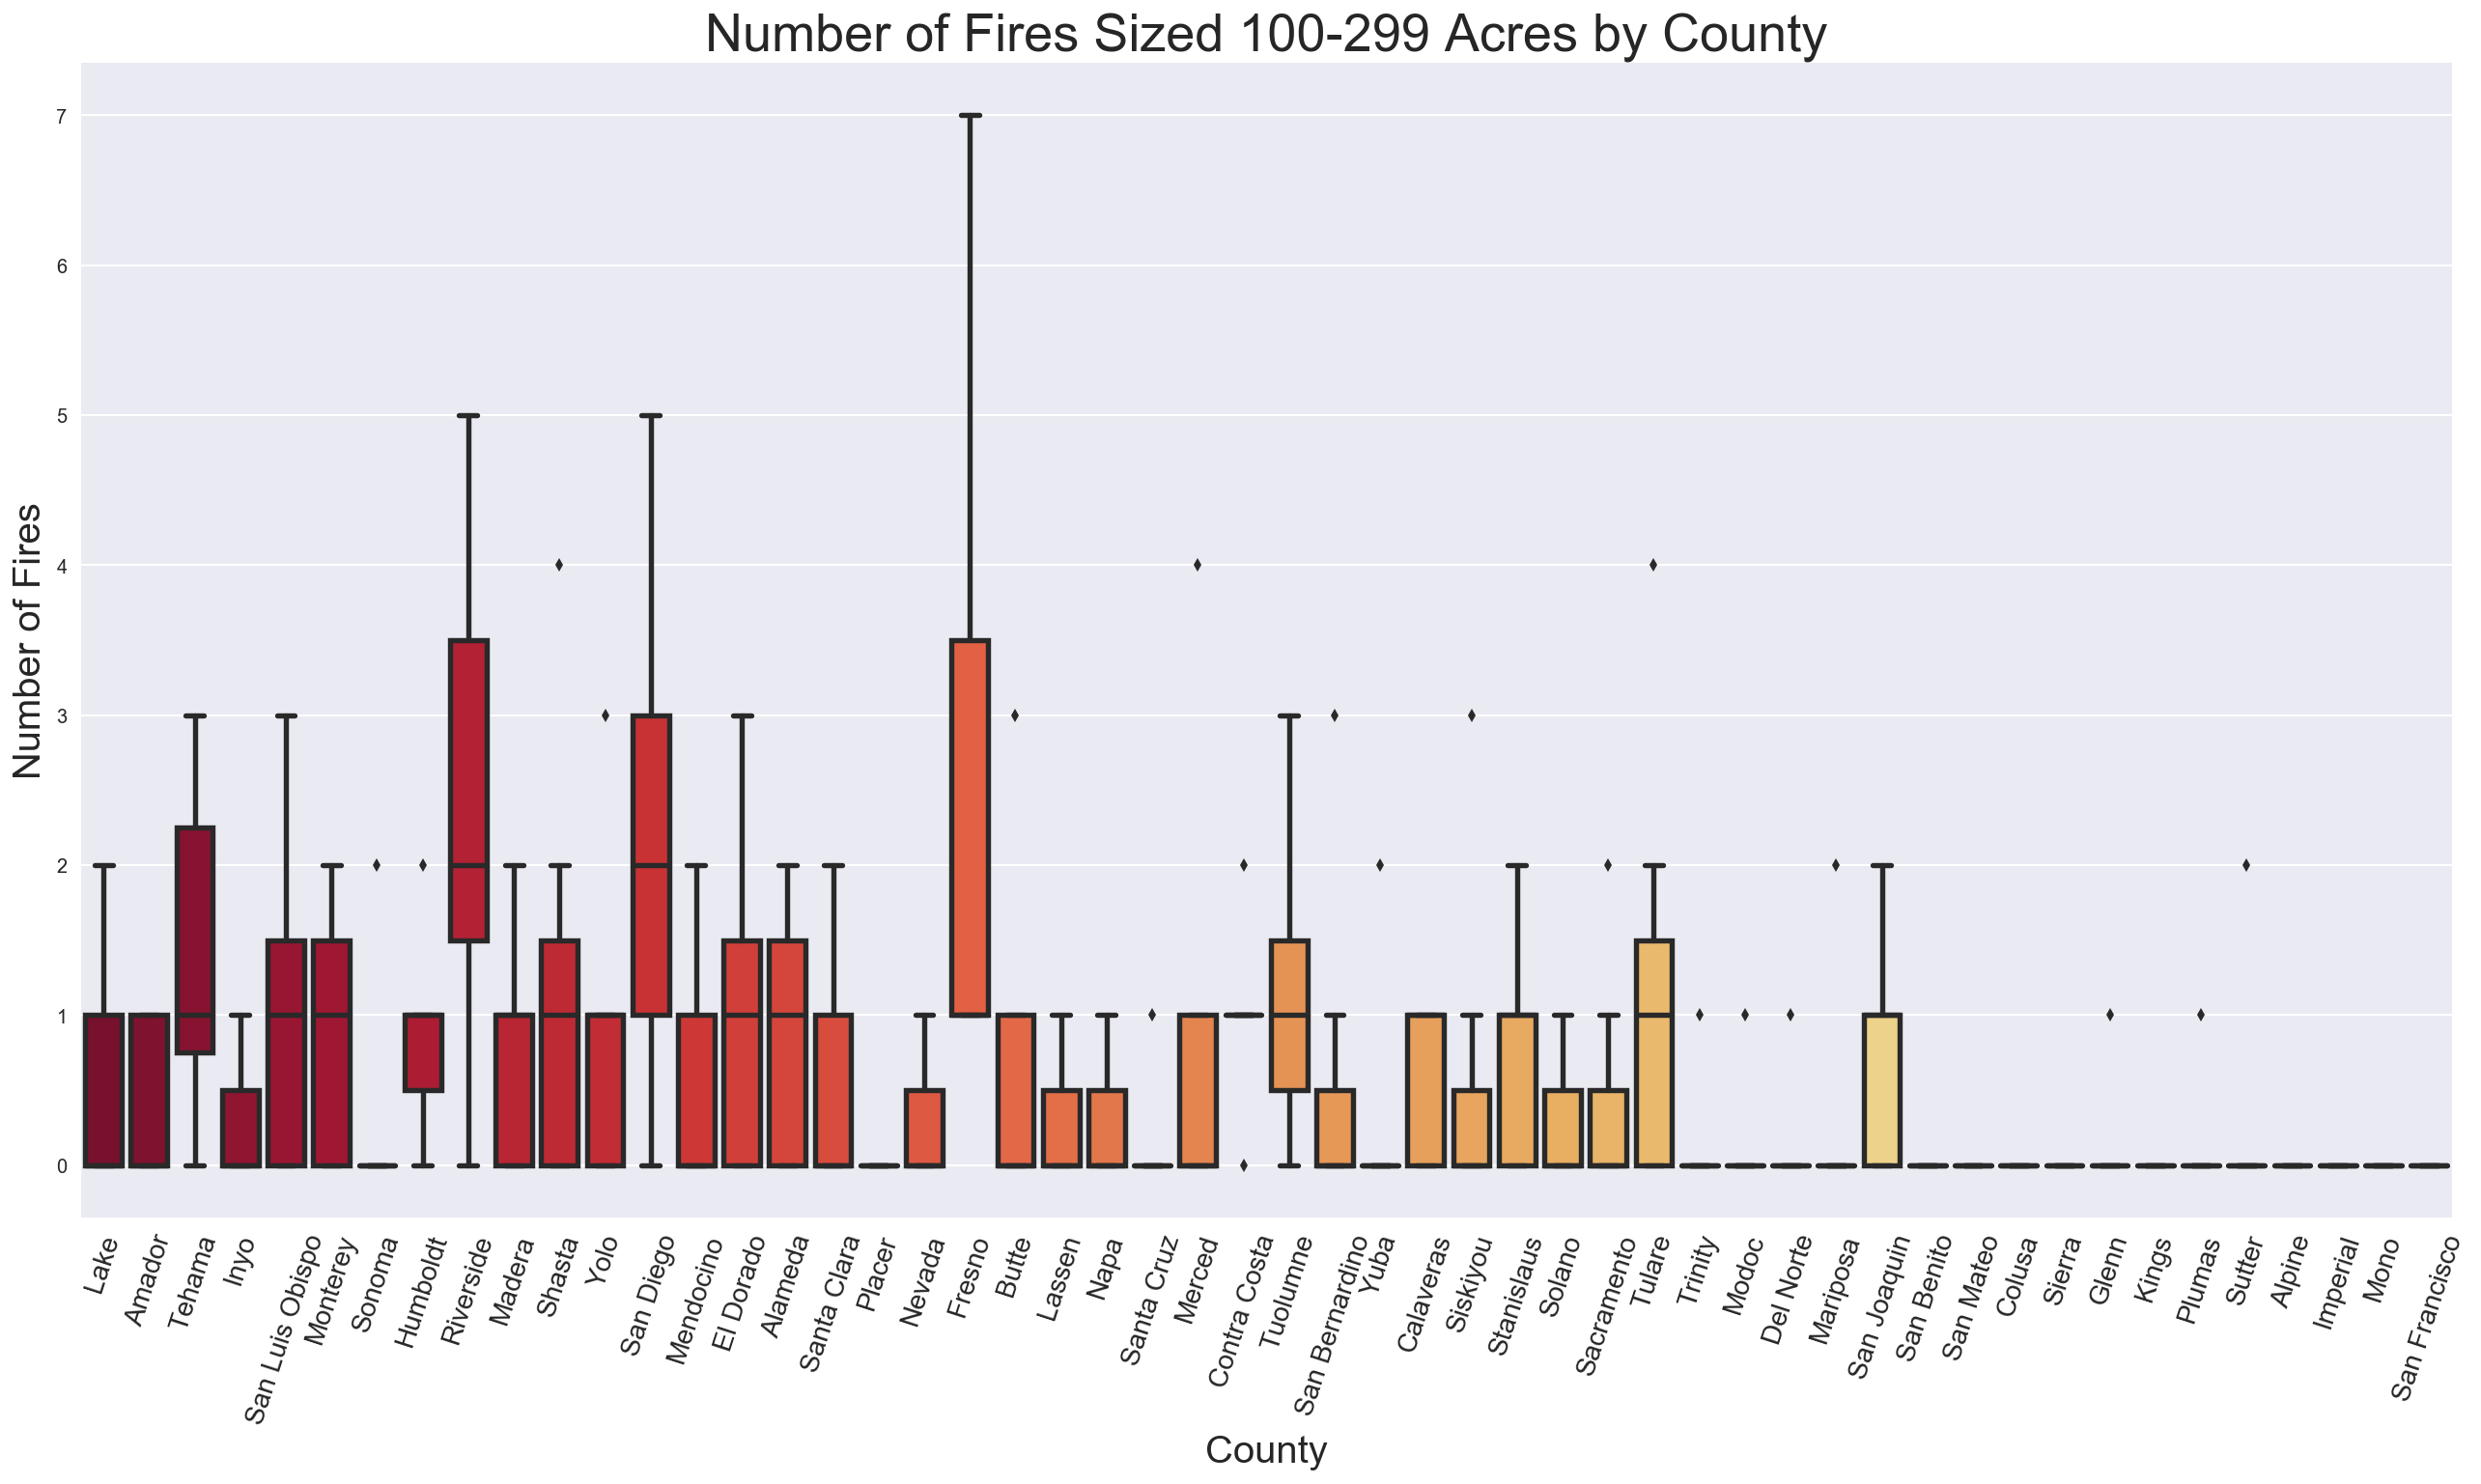

In [19]:
plt.figure(figsize=(22, 11))
sns.boxplot(x='county', y="100-299_acres_num_fire_size", data=df, palette="YlOrRd_r",  linewidth=2.7);
plt.xticks(rotation=72, fontsize=14);
plt.title('Number of Fires Sized 100-299 Acres by County', fontsize=27)
plt.xlabel('County', fontsize=20)
plt.ylabel('Number of Fires', fontsize=20);

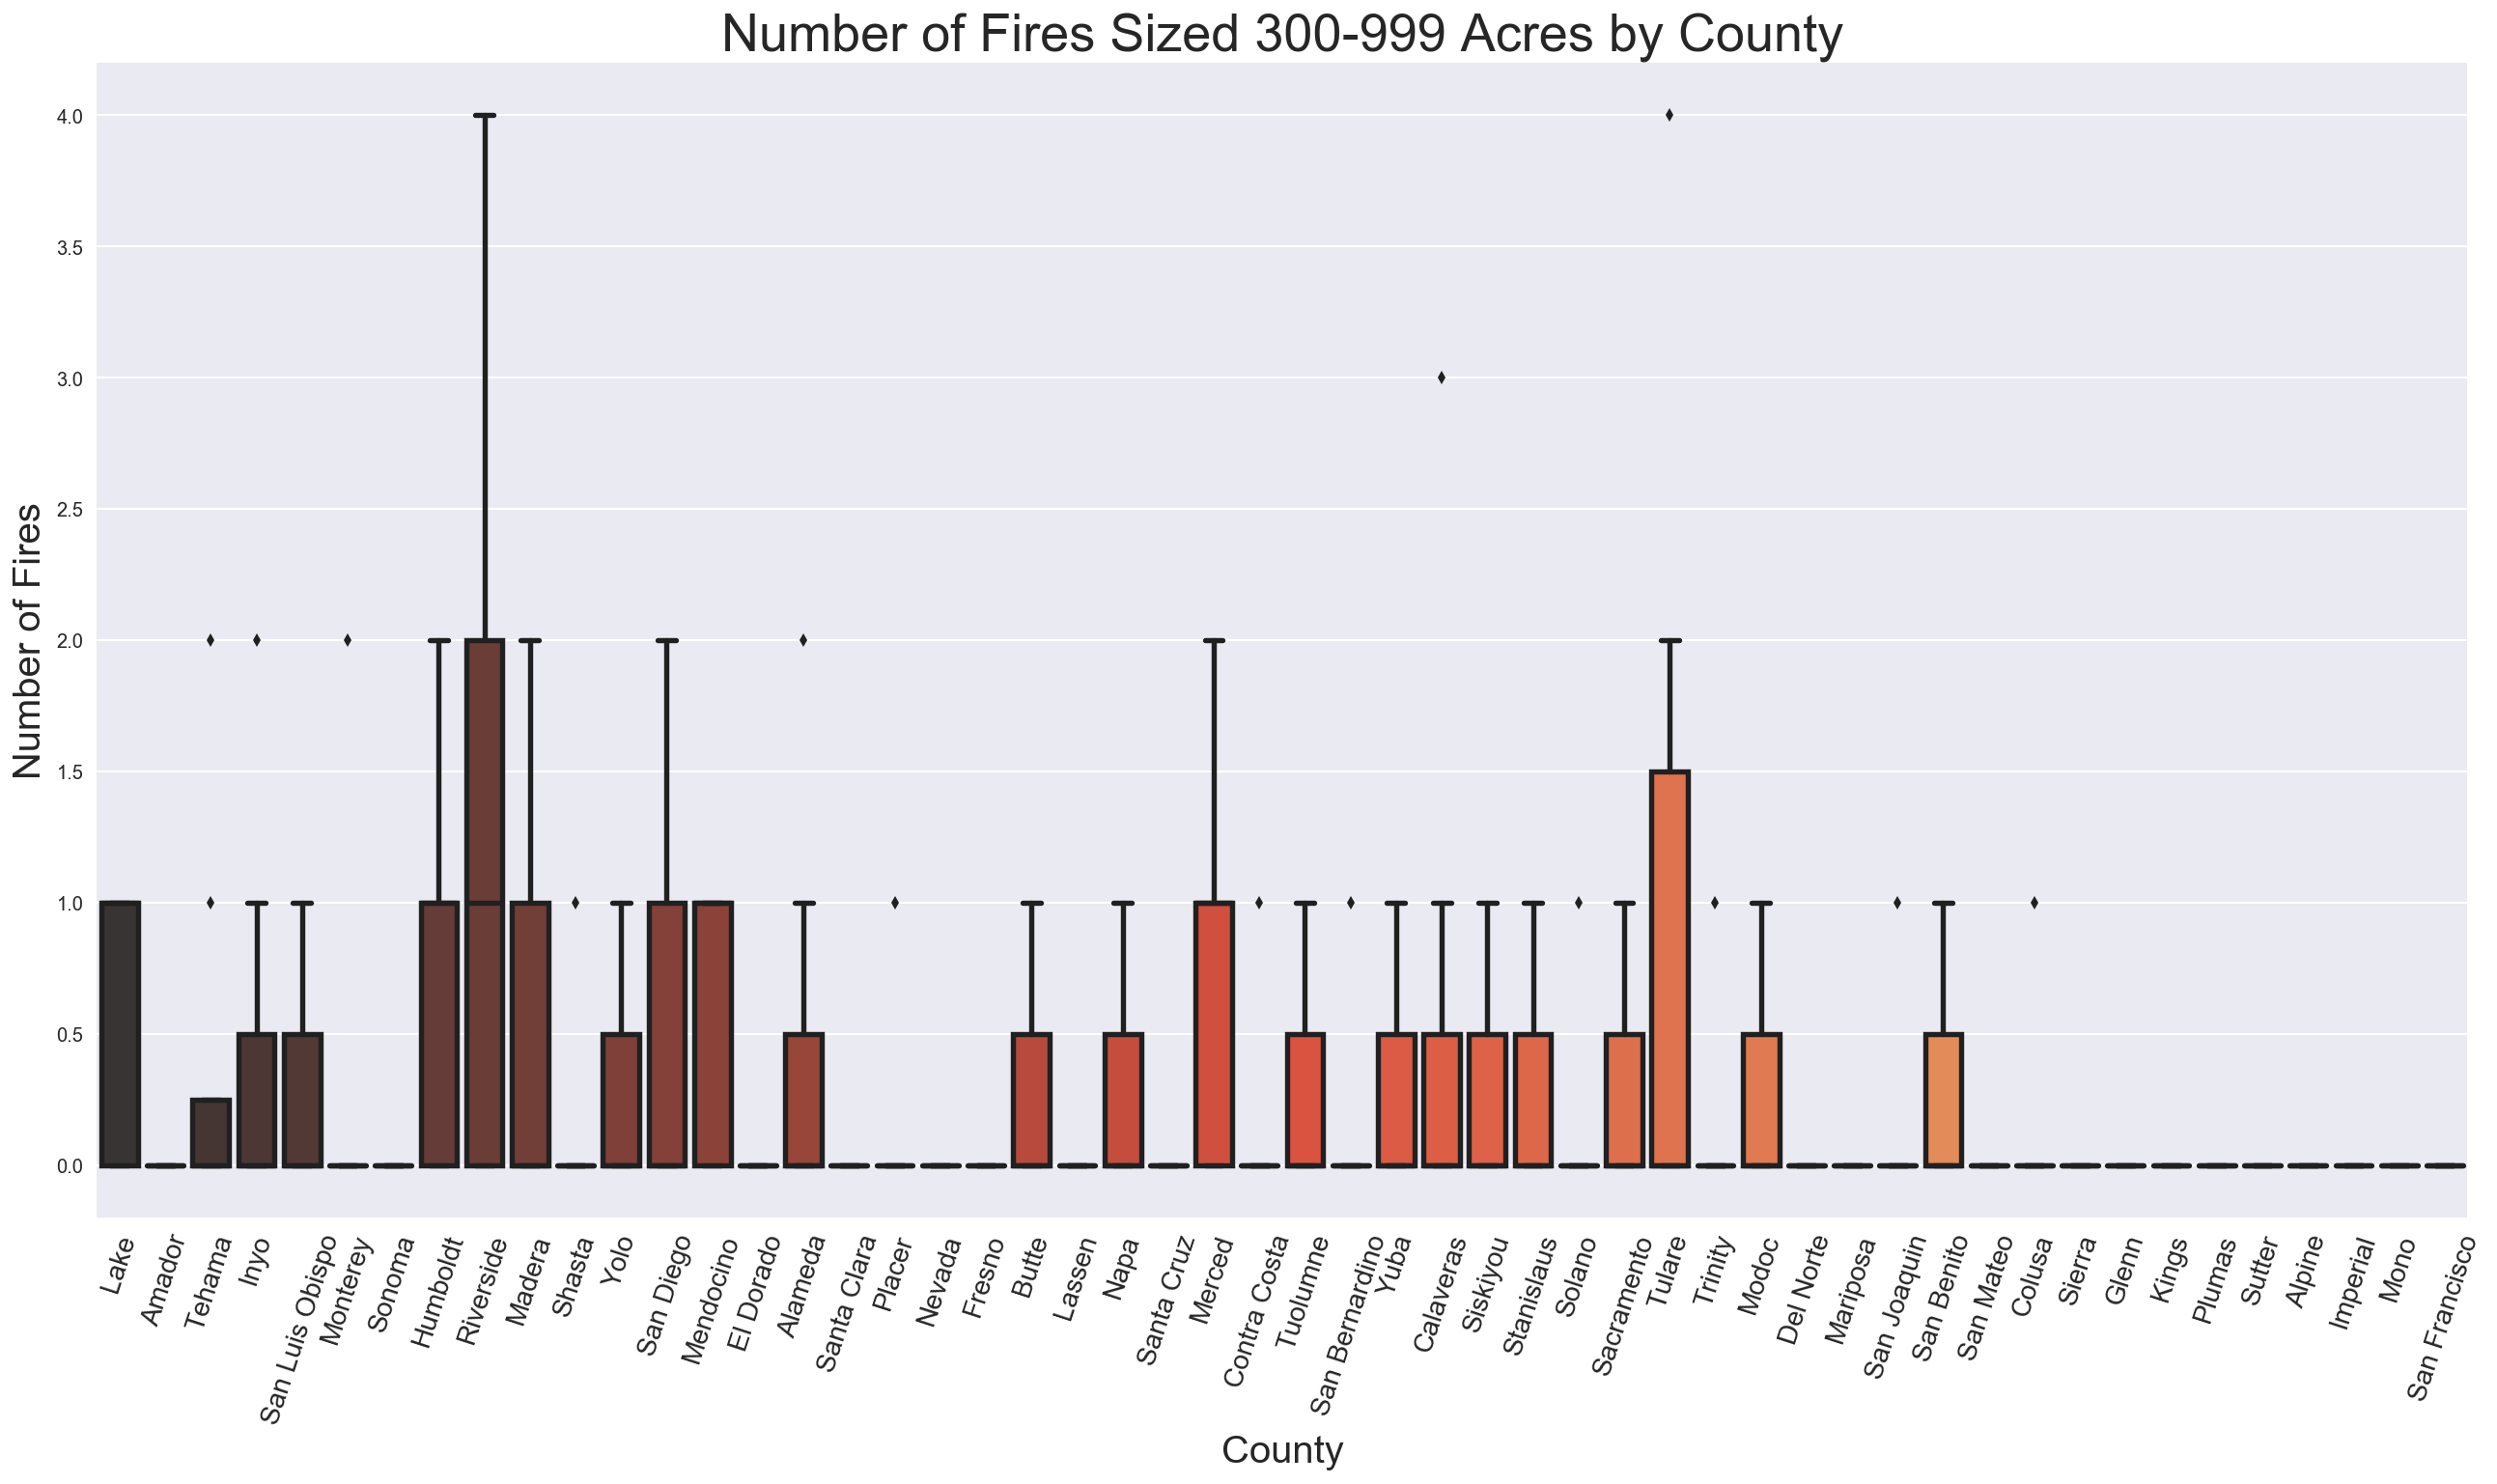

In [20]:
plt.figure(figsize=(22, 11))
sns.boxplot(x='county', y="300-999_acres_num_fire_size", data=df, palette="YlOrRd_d",  linewidth=2.7);
plt.xticks(rotation=72, fontsize=14);
plt.title('Number of Fires Sized 300-999 Acres by County', fontsize=27)
plt.xlabel('County', fontsize=20)
plt.ylabel('Number of Fires', fontsize=20);

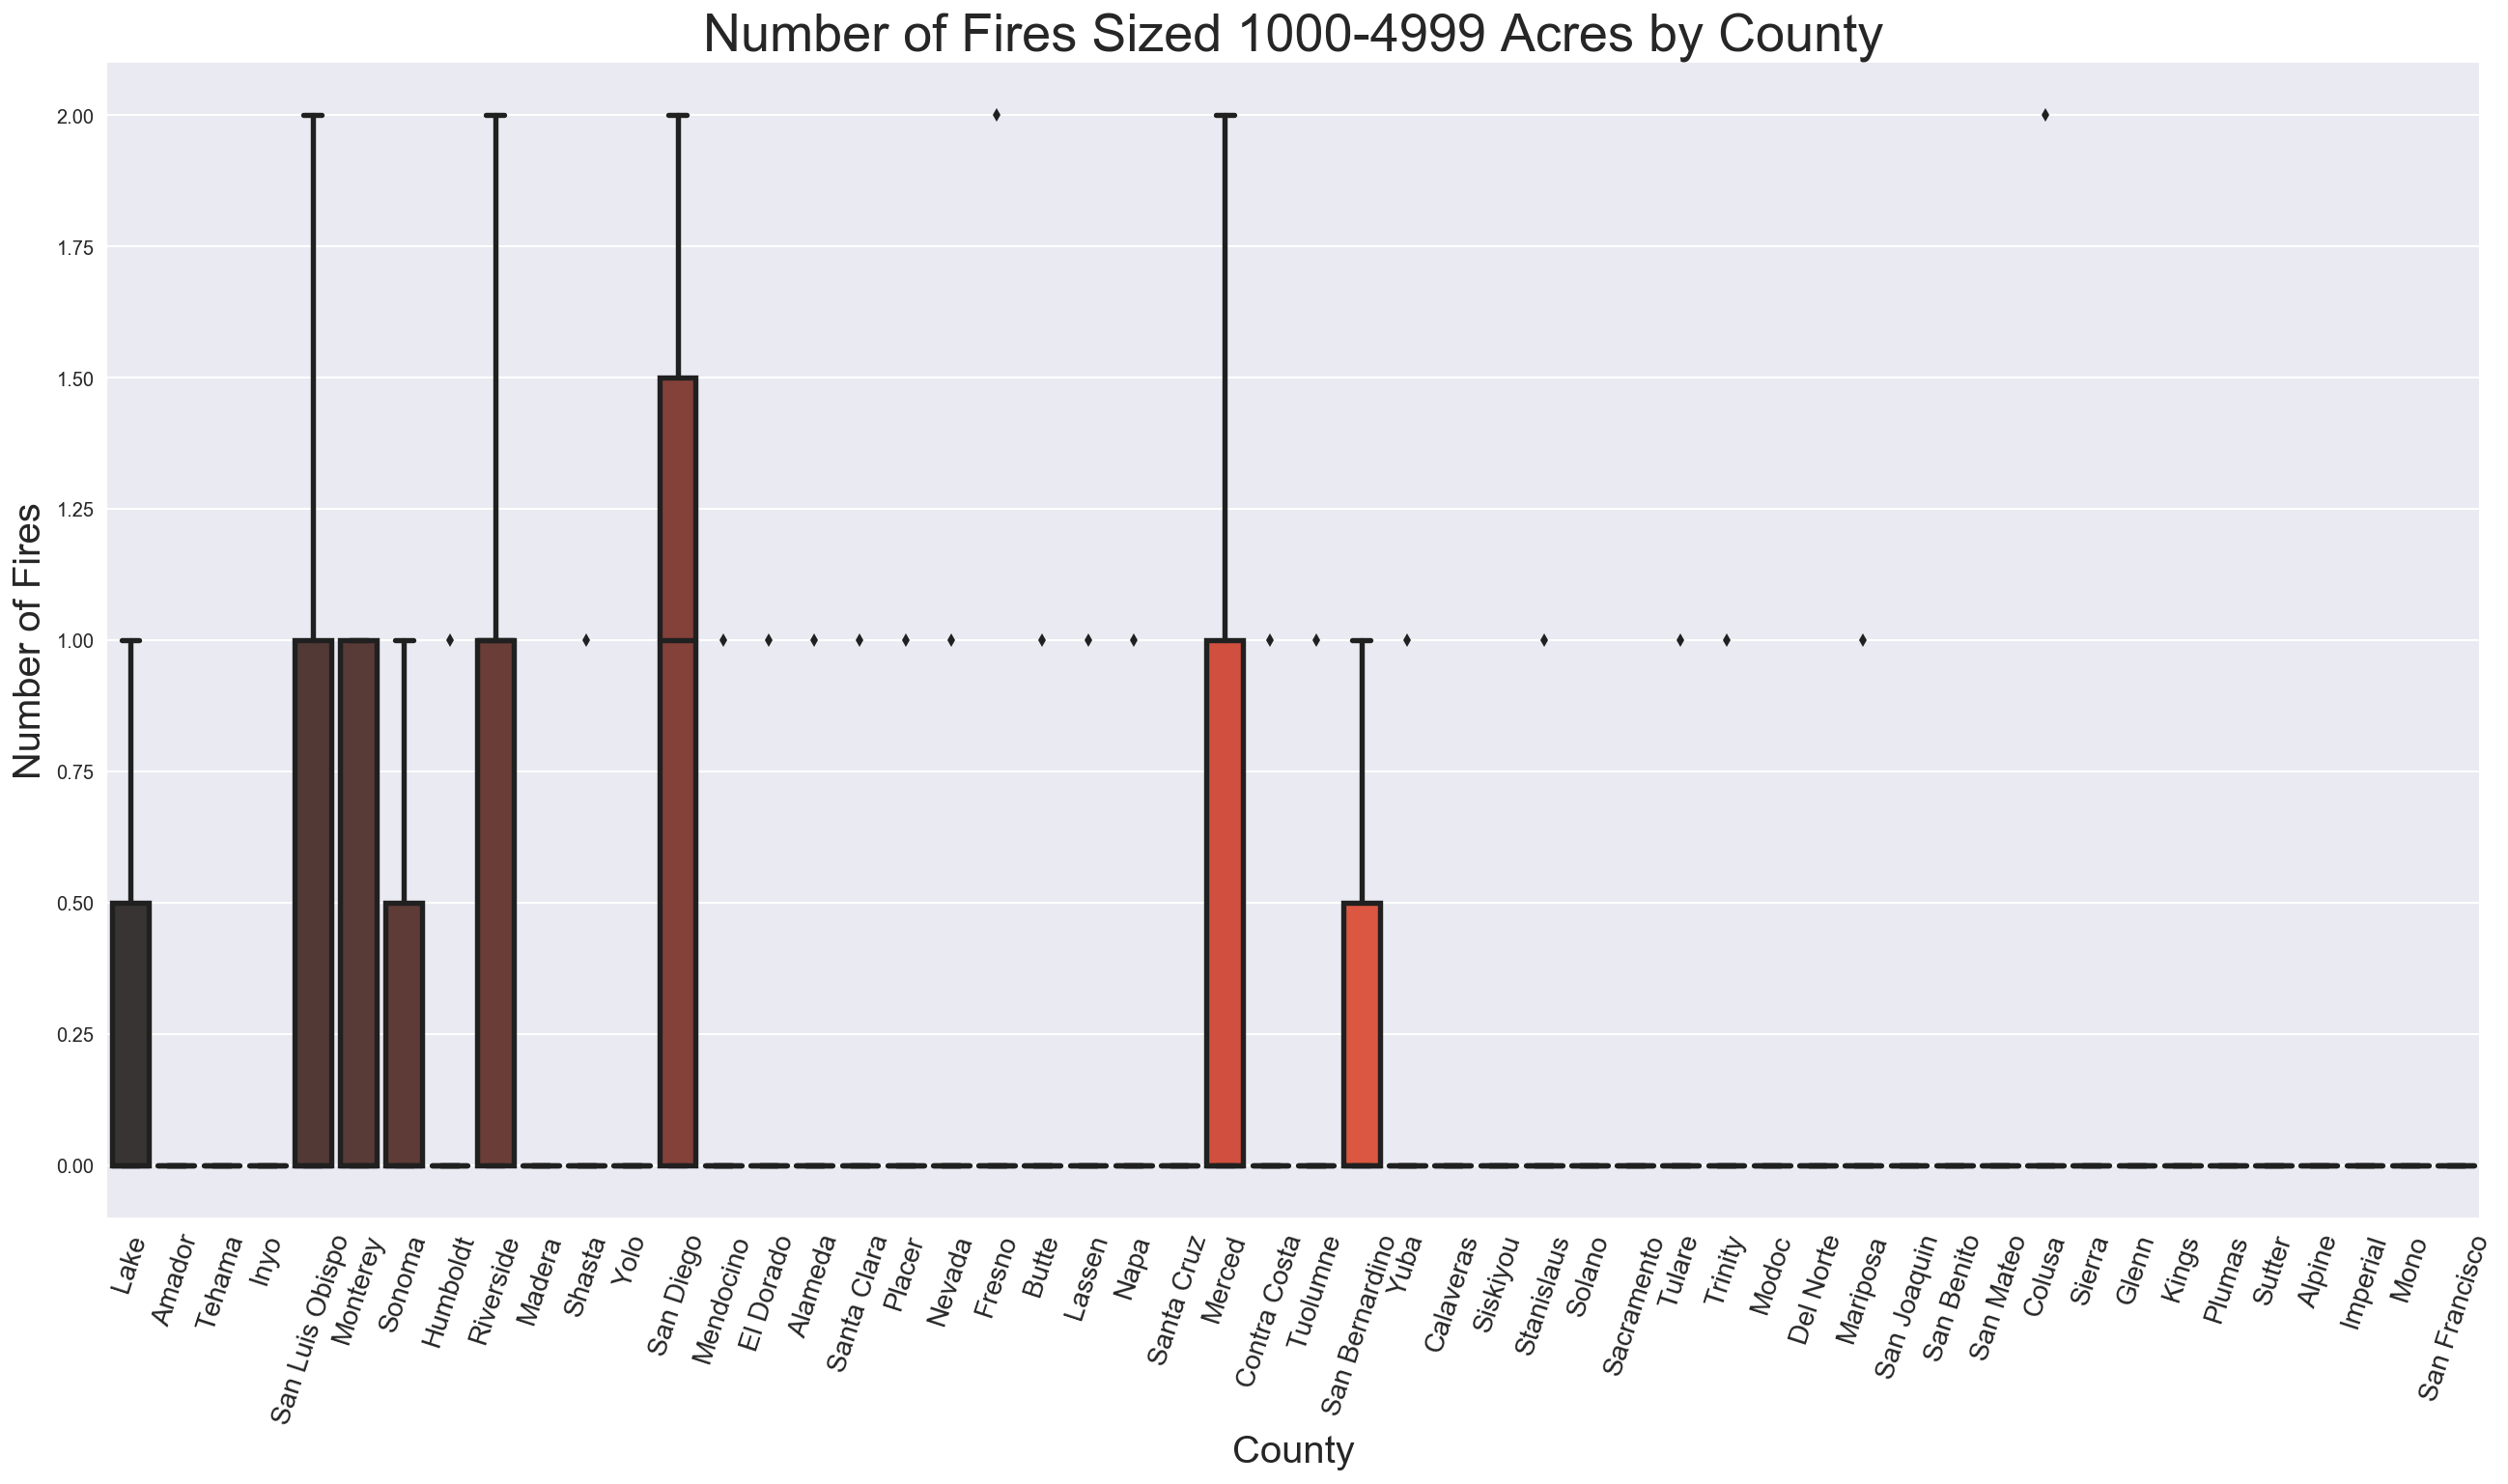

In [21]:
plt.figure(figsize=(22, 11))
sns.boxplot(x='county', y="1000-4999_acres_num_fire_size", data=df, palette="YlOrRd_d",  linewidth=2.7);
plt.xticks(rotation=72, fontsize=14);
plt.title('Number of Fires Sized 1000-4999 Acres by County', fontsize=27)
plt.xlabel('County', fontsize=20)
plt.ylabel('Number of Fires', fontsize=20);

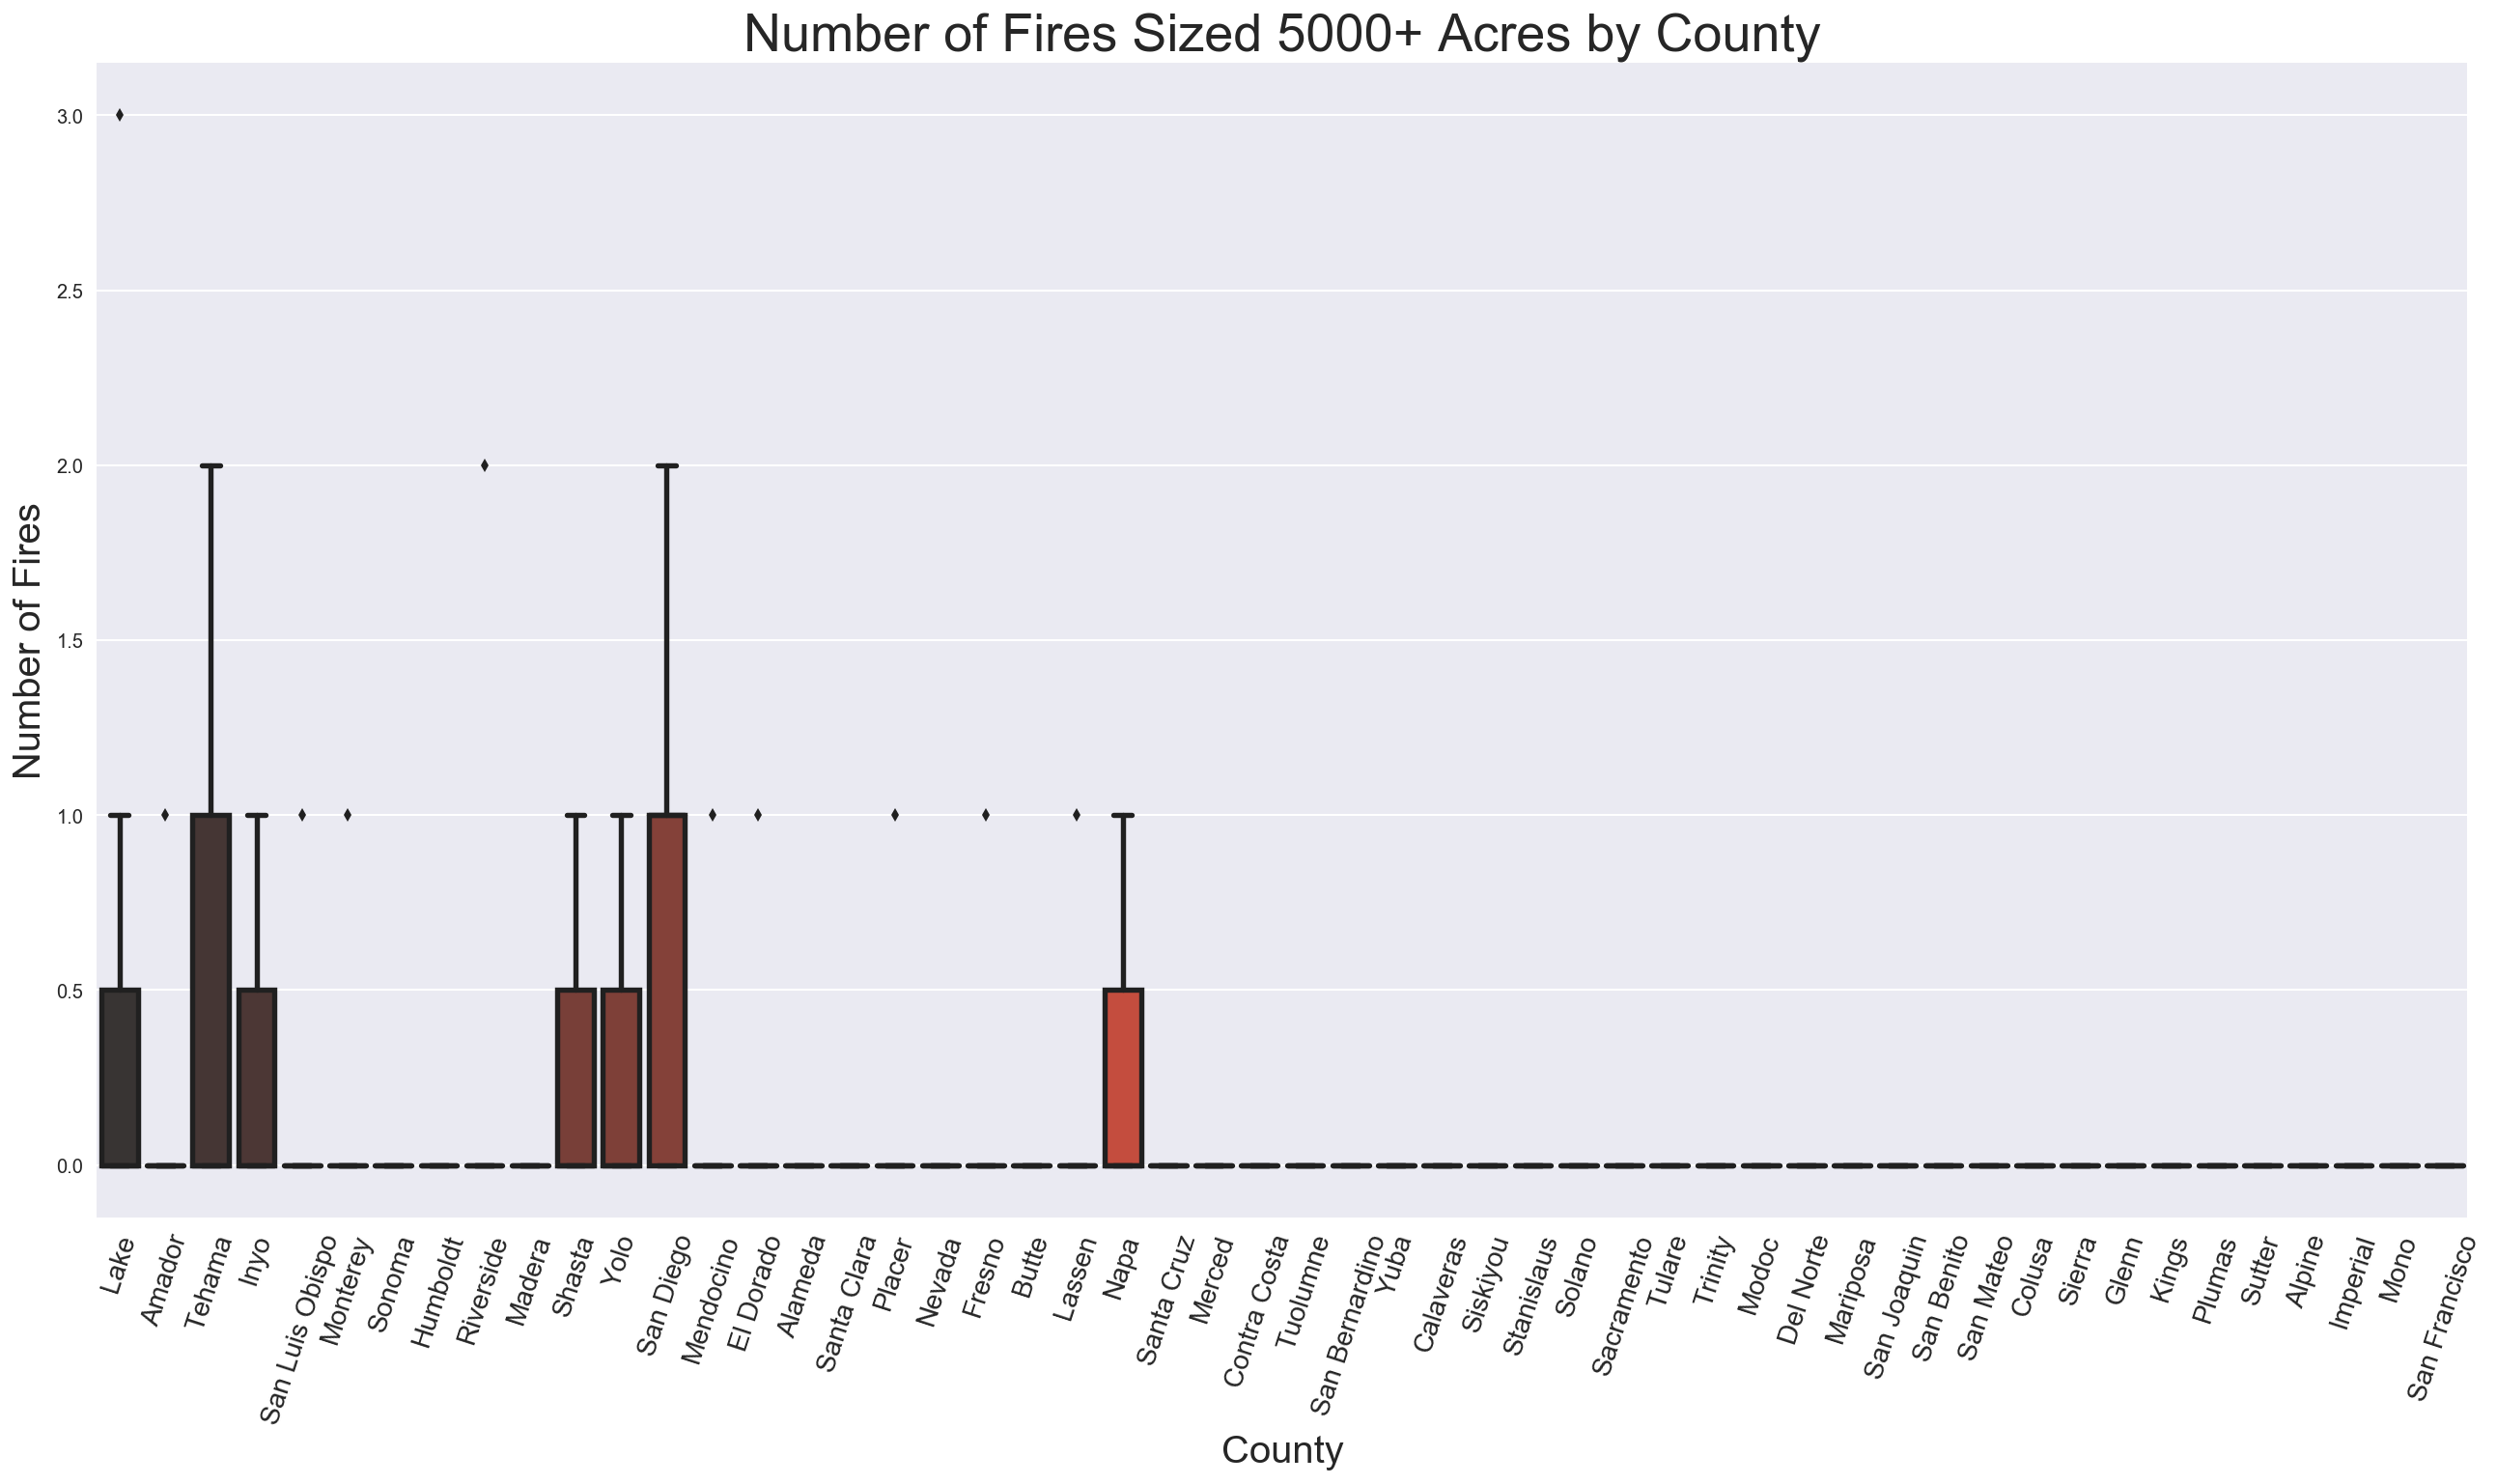

In [22]:
plt.figure(figsize=(22, 11))
sns.boxplot(x='county', y="5000_acres_>_num_fire_size", data=df, palette="YlOrRd_d",  linewidth=2.7);
plt.xticks(rotation=72, fontsize=14);
plt.title('Number of Fires Sized 5000+ Acres by County', fontsize=27)
plt.xlabel('County', fontsize=20)
plt.ylabel('Number of Fires', fontsize=20);

/Users/amandajo/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


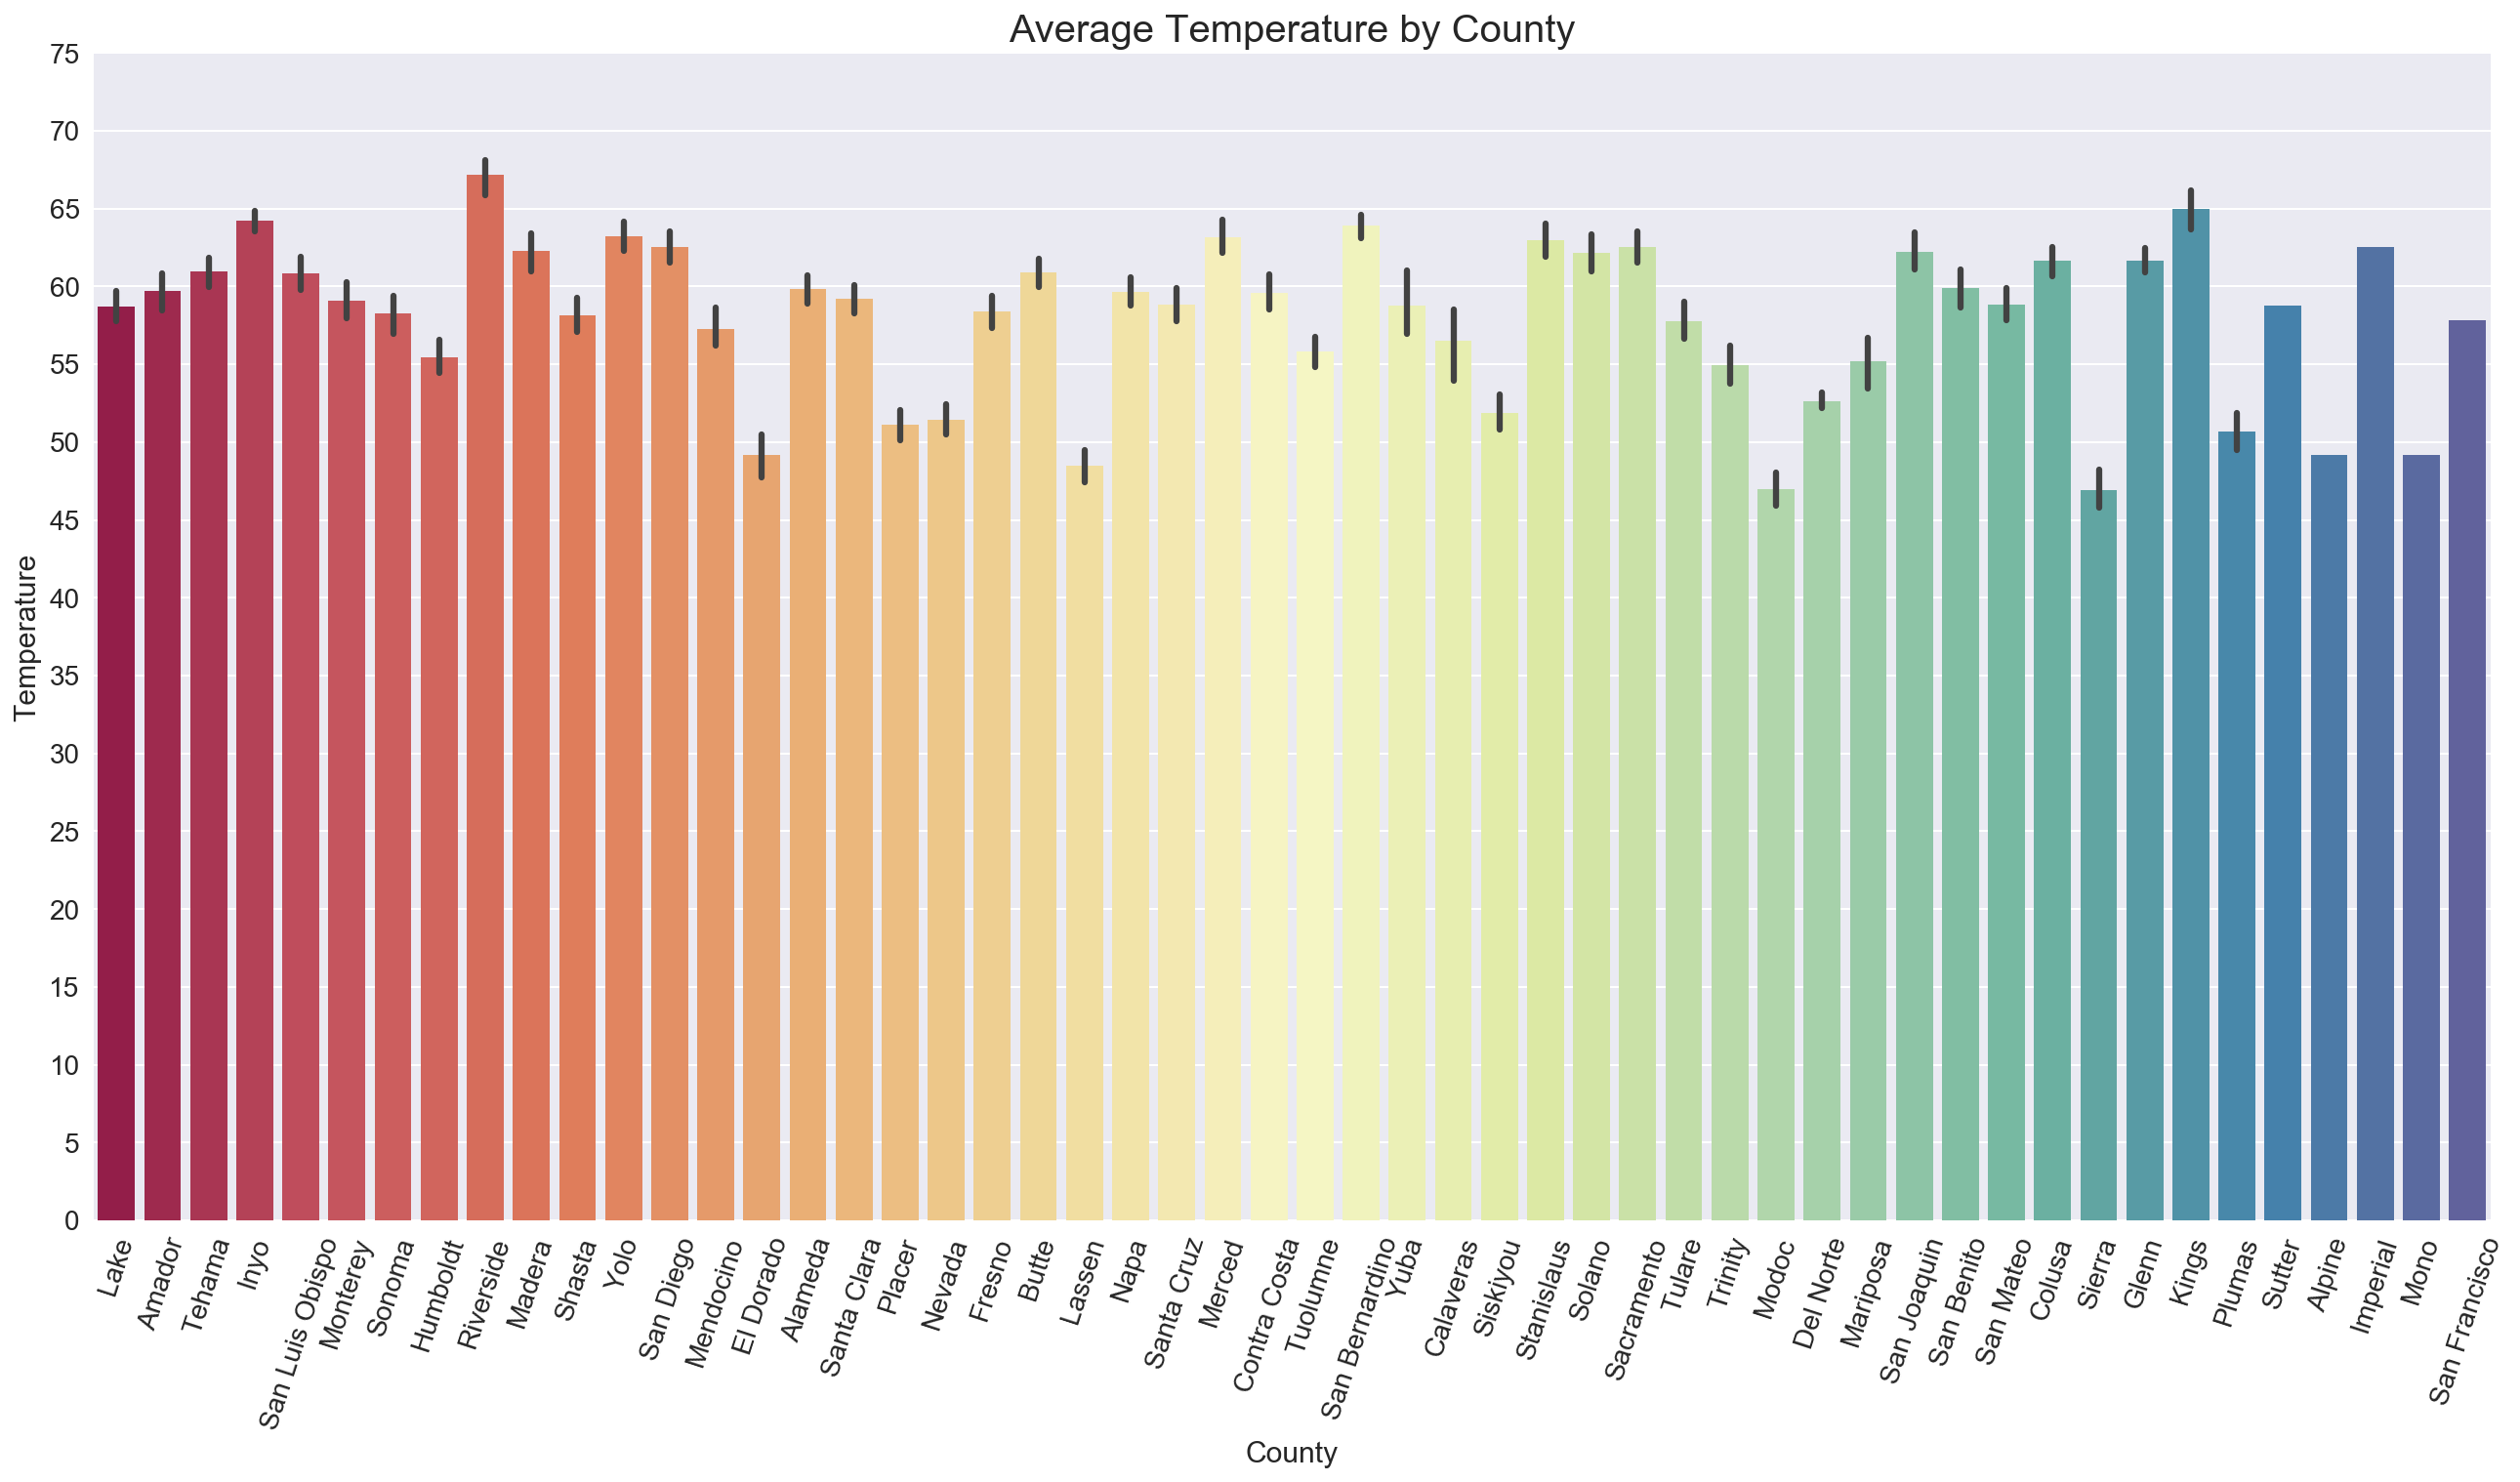

In [23]:
plt.figure(figsize=(22, 11))
sns.barplot(df["county"],df["tavg"], palette="Spectral")
plt.yticks(np.arange(0, 80, step=5), fontsize=14);
plt.xticks(rotation=72, fontsize=14);
plt.title('Average Temperature by County', fontsize=20)
plt.xlabel('County', fontsize=15)
plt.ylabel('Temperature', fontsize=15);

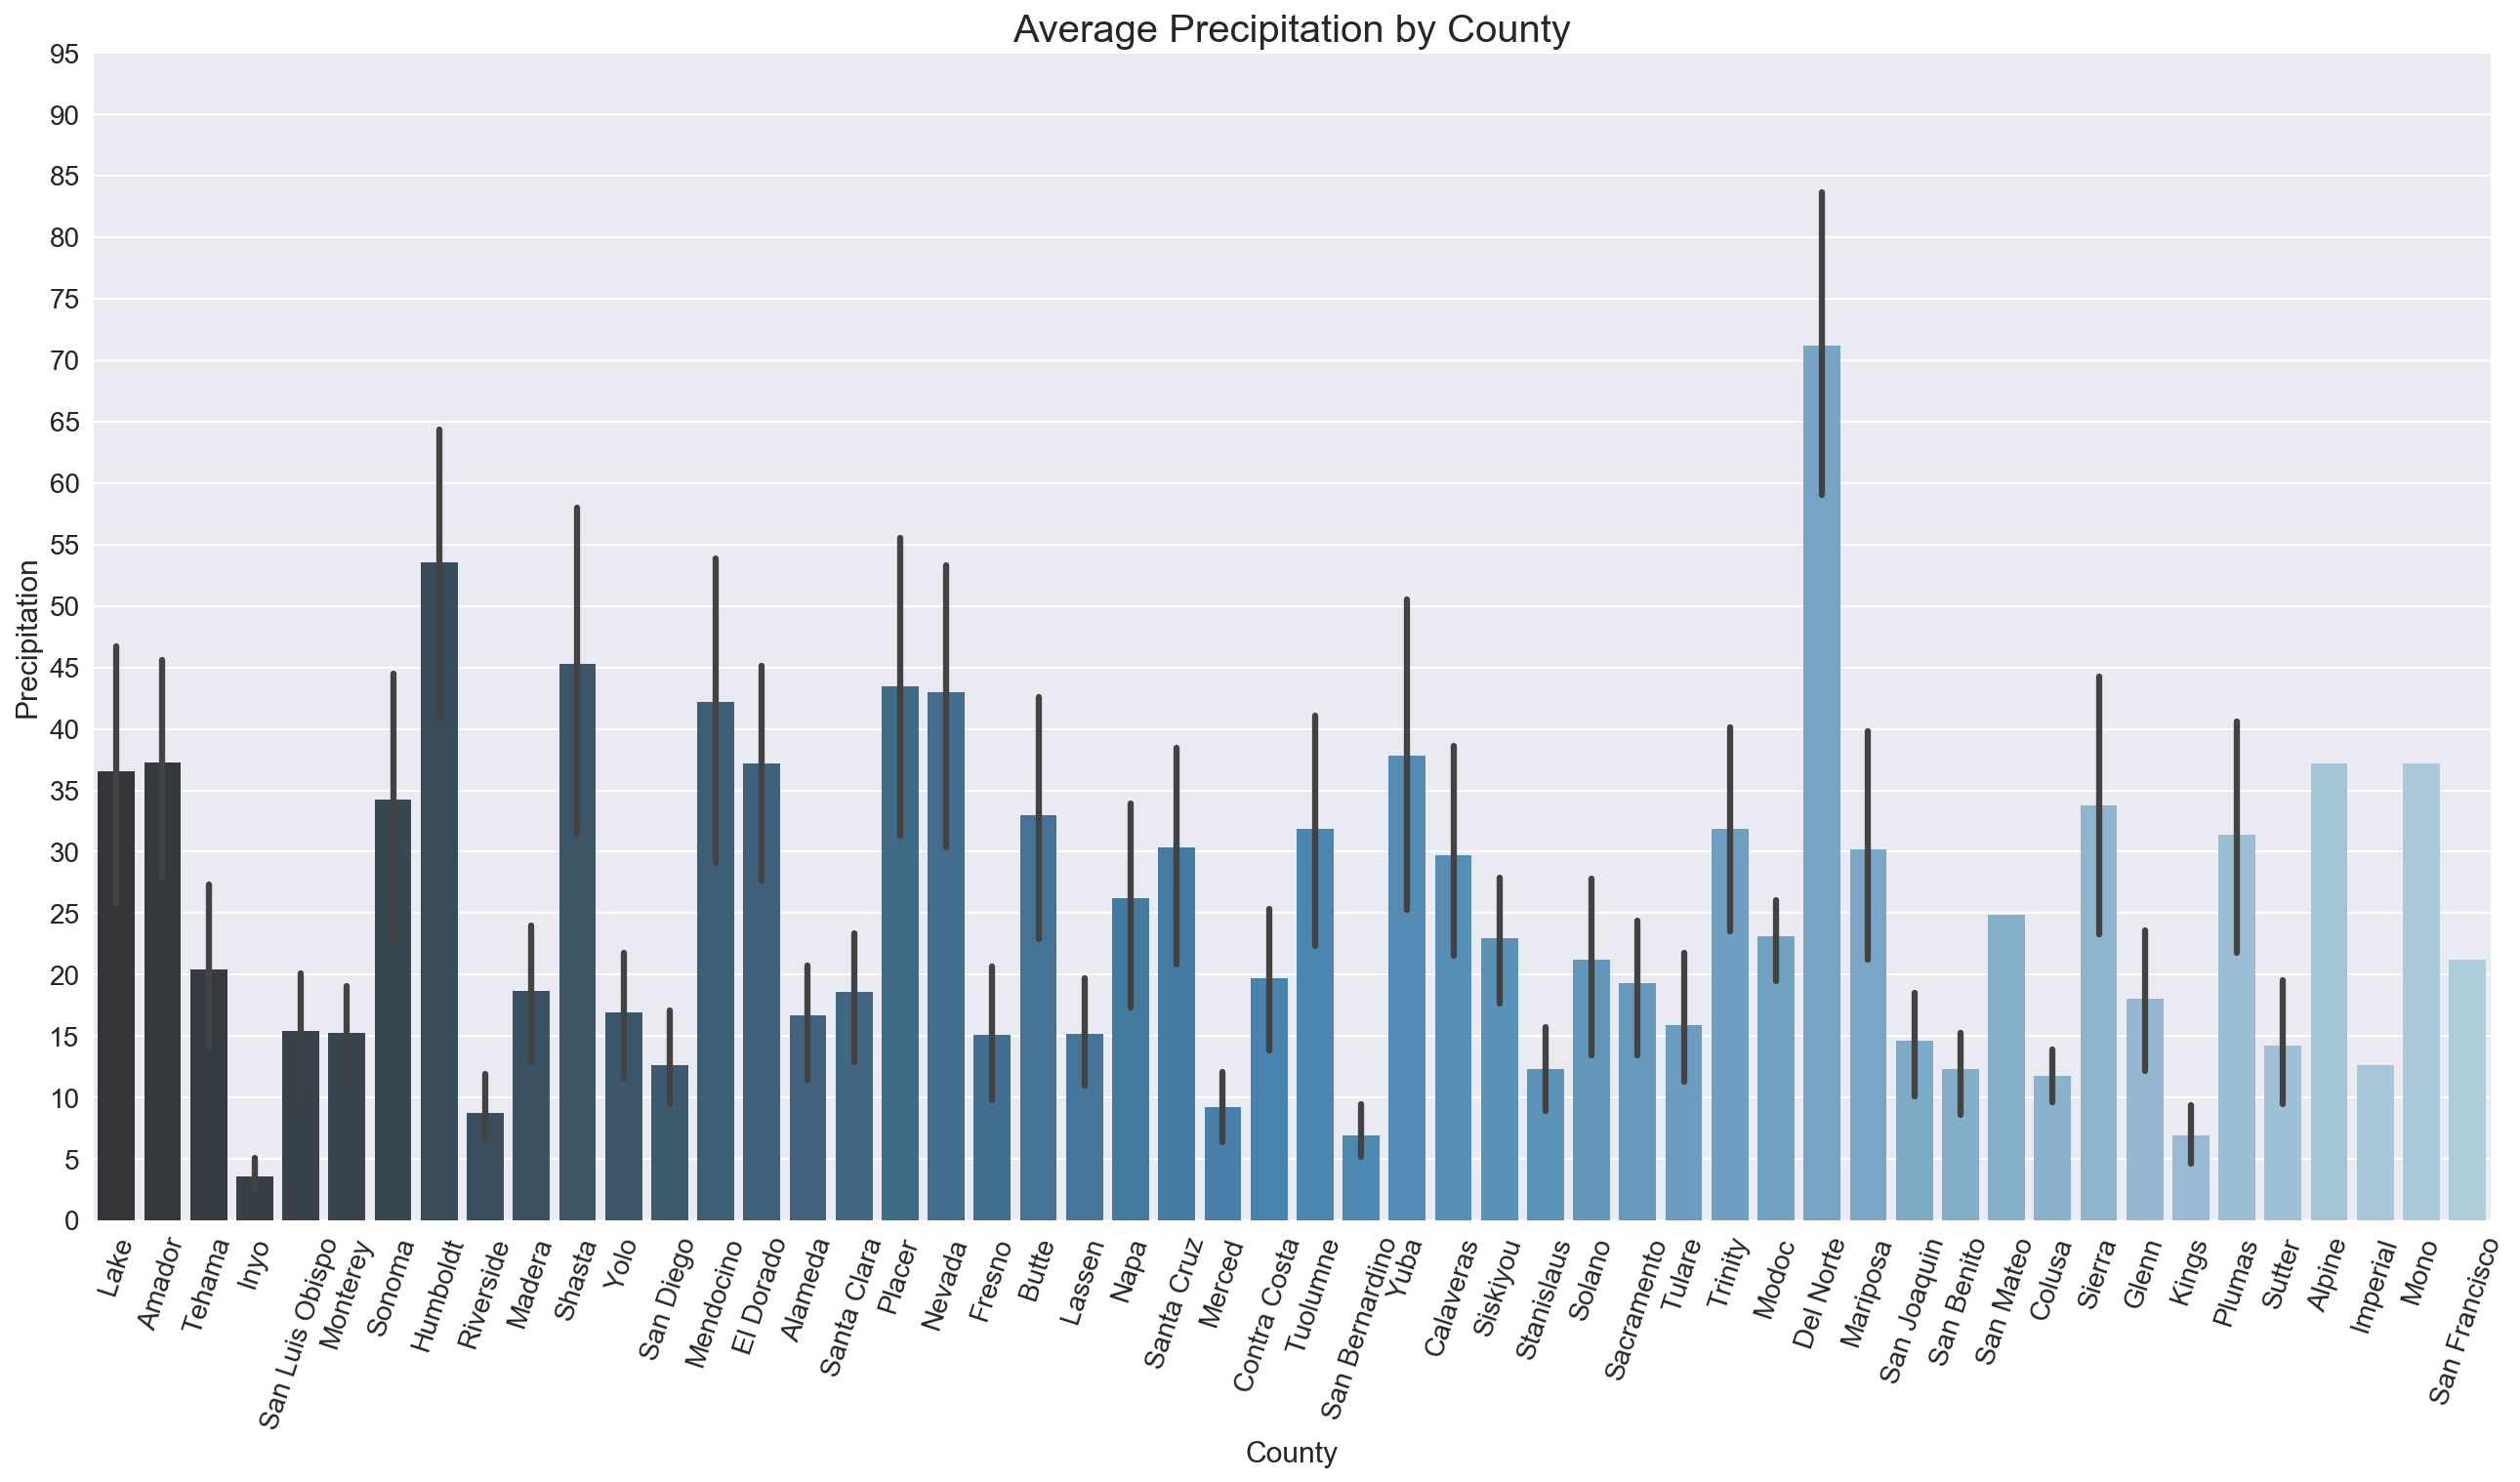

In [24]:
plt.figure(figsize=(22, 11))
sns.barplot(df["county"],df["prcp"], palette="Blues_d")
plt.yticks(np.arange(0, 100, step=5), fontsize=14);
plt.xticks(rotation=72, fontsize=14);
plt.title('Average Precipitation by County', fontsize=20)
plt.xlabel('County', fontsize=15)
plt.ylabel('Precipitation', fontsize=15);

In [25]:
df.shape

(338, 38)

In [26]:
df.sort_values(by='target', ascending=False).head(8)

county      target  .25_acres_or_<_num_fire_size  av_ac_brn_0.125  \
0             Lake  2017984089                            42            5.250   
1           Amador  1000000709                            28            3.500   
2             Lake   105579028                            53            6.625   
3           Tehama    16489420                            30            3.750   
4             Inyo    15819560                             9            1.125   
5  San Luis Obispo    12215711                            71            8.875   
6         Monterey    11222283                            26            3.250   
7         Monterey    10005710                            30            3.750   

   .26-9.99_acres_num_fire_size  av_ac_brn_8.865  10-99_acres_num_fire_size  \
0                            26          126.490                          2   
1                            17           82.705                          0   
2                            14           68.110                          6   
3                            34          165.410                          8   
4                             2            9.730                          0   
5                            65          316.225                          8   
6                            23          111.895                          5   
7                            22          107.030                          1   

   av_ac_brn_44.5  100-299_acres_num_fire_size  av_ac_brn_99.5  ...  \
0            89.0                            1            99.5  ...   
1             0.0                            0             0.0  ...   
2           267.0                            0             0.0  ...   
3           356.0                            2           199.0  ...   
4             0.0                            0             0.0  ...   
5           356.0                            1            99.5  ...   
6           222.5                            2           199.0  ...   
7            44.5                            0             0.0  ...   

   amt_forest  tot_ac_brn  tot_ac_brn_half  tot_num_fire  tot_av_ac_brn.1  \
0         2.0        1700            850.0            47          854.490   
1         4.0          84             42.0            41          120.600   
2         2.0         381            190.5            84          565.850   
3         3.0         459            229.5            85          334.495   
4         2.0          14              7.0             4           19.460   
5         1.0         818            409.0            41          339.900   
6         2.0          44             22.0            24           36.180   
7         2.0         267            133.5           109          282.495   

         pop    area  pop_dense  forest_acr  percent_forest_acr  
0  1663190.0   738.0    2253.64   103910.40                0.22  
1    38626.0   606.0      63.74   137270.18                0.35  
2   229294.0  1640.0     139.81   237591.23                0.23  
3    45670.0  1020.0      44.77   140871.93                0.22  
4    21805.0  1151.0      18.94   114082.46                0.15  
5  1147439.0   720.0    1593.67    69120.00                0.15  
6        NaN     NaN        NaN   811740.35                1.03  
7   188987.0  1712.0     110.39   879610.53                0.80  

[8 rows x 38 columns]

In [27]:
#lazy way to remove outliers
df_edit = df.sort_values(by='target', ascending=False).tail(334)
df_edit.head()

county    target  .25_acres_or_<_num_fire_size  av_ac_brn_0.125  \
4             Inyo  15819560                             9            1.125   
5  San Luis Obispo  12215711                            71            8.875   
6         Monterey  11222283                            26            3.250   
7         Monterey  10005710                            30            3.750   
8           Sonoma   9366896                           109           13.625   

   .26-9.99_acres_num_fire_size  av_ac_brn_8.865  10-99_acres_num_fire_size  \
4                             2            9.730                          0   
5                            65          316.225                          8   
6                            23          111.895                          5   
7                            22          107.030                          1   
8                            76          369.740                          8   

   av_ac_brn_44.5  100-299_acres_num_fire_size  av_ac_brn_99.5  ...  \
4             0.0                            0             0.0  ...   
5           356.0                            1            99.5  ...   
6           222.5                            2           199.0  ...   
7            44.5                            0             0.0  ...   
8           356.0                            2           199.0  ...   

   amt_forest  tot_ac_brn  tot_ac_brn_half  tot_num_fire  tot_av_ac_brn.1  \
4         2.0          14              7.0             4           19.460   
5         1.0         818            409.0            41          339.900   
6         2.0          44             22.0            24           36.180   
7         2.0         267            133.5           109          282.495   
8         2.0         720            360.0            51          320.765   

         pop    area  pop_dense  forest_acr  percent_forest_acr  
4    21805.0  1151.0      18.94   114082.46                0.15  
5  1147439.0   720.0    1593.67    69120.00                0.15  
6        NaN     NaN        NaN   811740.35                1.03  
7   188987.0  1712.0     110.39   879610.53                0.80  
8   989255.0  5963.0     165.90  1731308.77                0.45  

[5 rows x 38 columns]

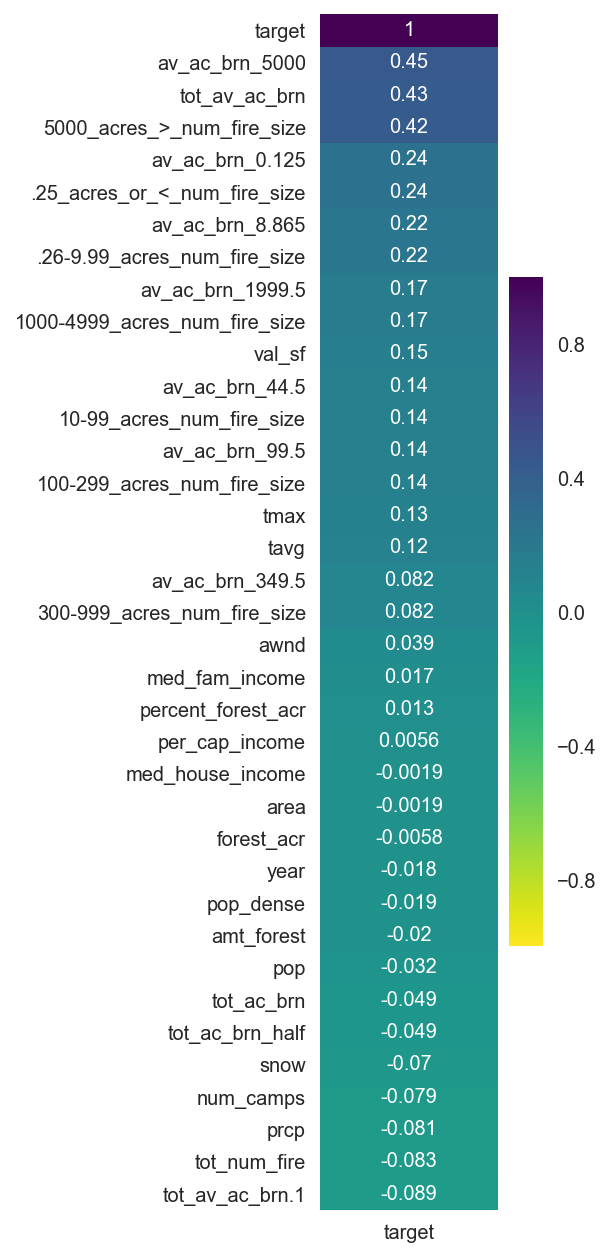

In [28]:
#heatmap to specifically sort correlations to target only
fix, ax = plt.subplots(figsize=(2,11))
sns.heatmap(df_edit.corr()[['target']].sort_values('target', ascending=False), annot=True, cmap='viridis_r')

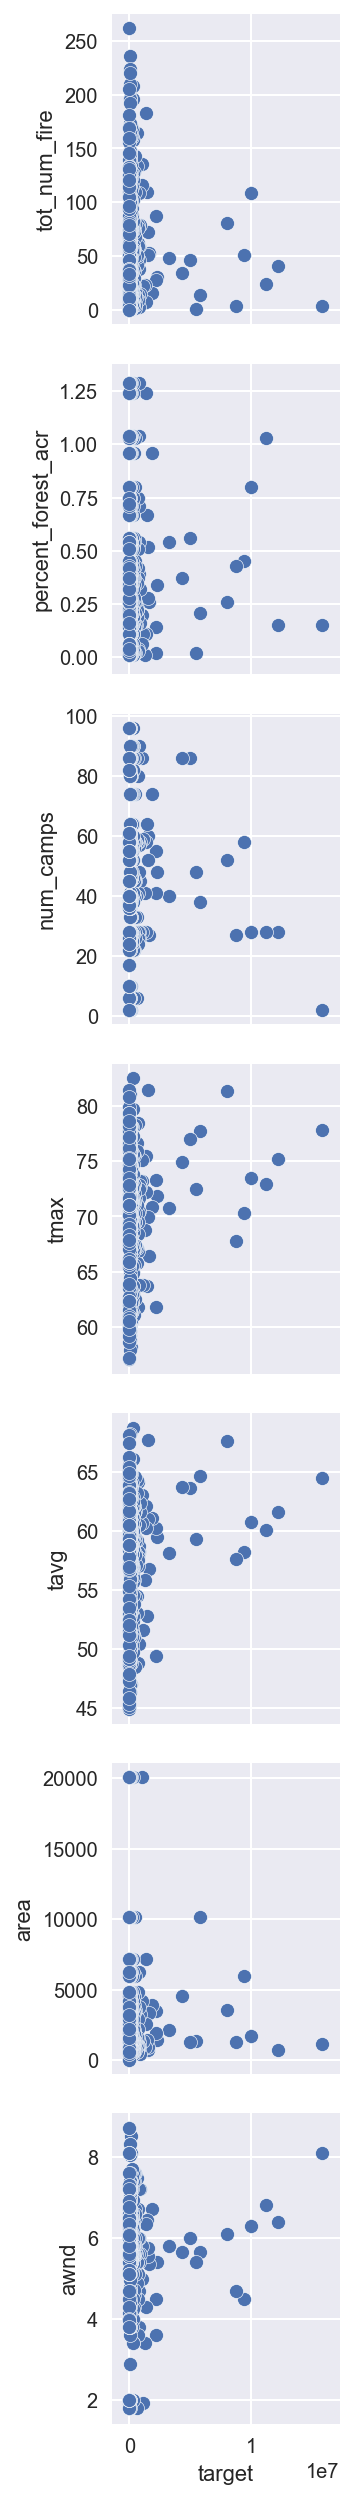

In [29]:
sns.pairplot(df_edit, y_vars=['tot_num_fire', 
            'percent_forest_acr', 
            'num_camps', 
            'tmax', 
            'tavg',
            'area',
            'awnd'], x_vars=['target'])

/Users/amandajo/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


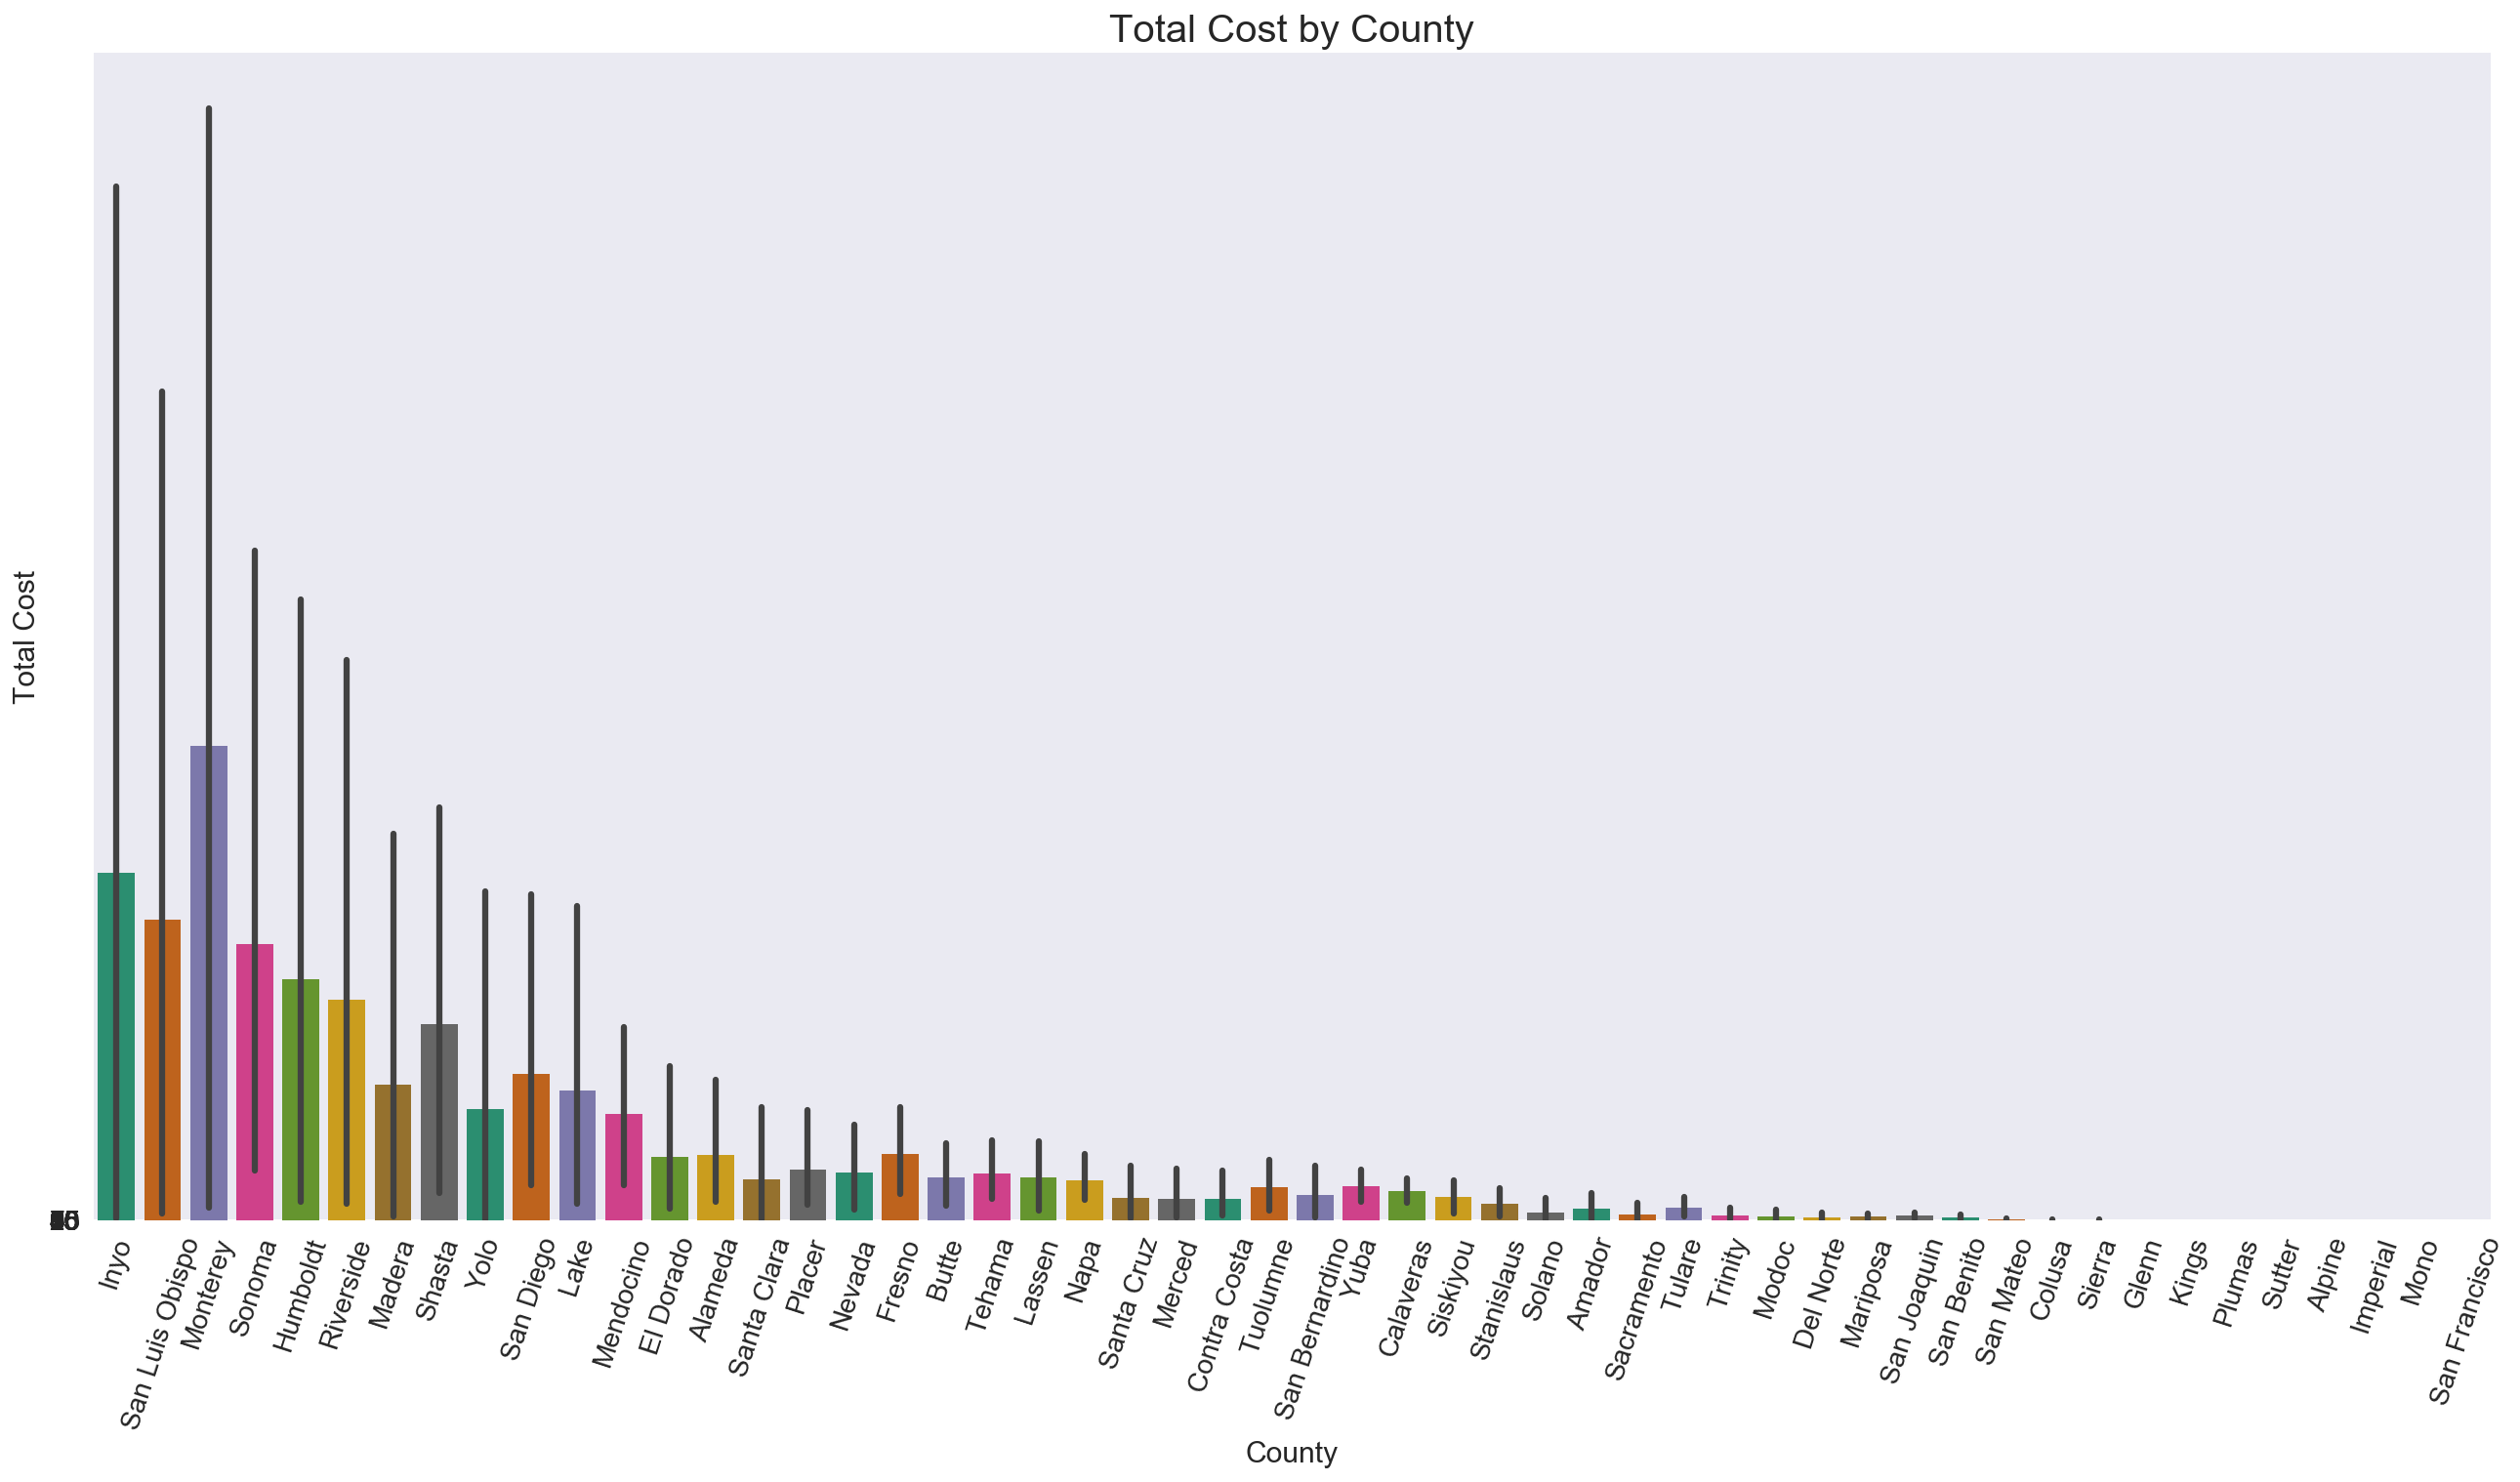

In [30]:
plt.figure(figsize=(22, 11))
sns.barplot(df_edit["county"],df_edit["target"], palette='Dark2')
plt.yticks(np.arange(0, 100, step=5), fontsize=14);
plt.xticks(rotation=72, fontsize=14);
plt.title('Total Cost by County', fontsize=20)
plt.xlabel('County', fontsize=15)
plt.ylabel('Total Cost', fontsize=15);

/Users/amandajo/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


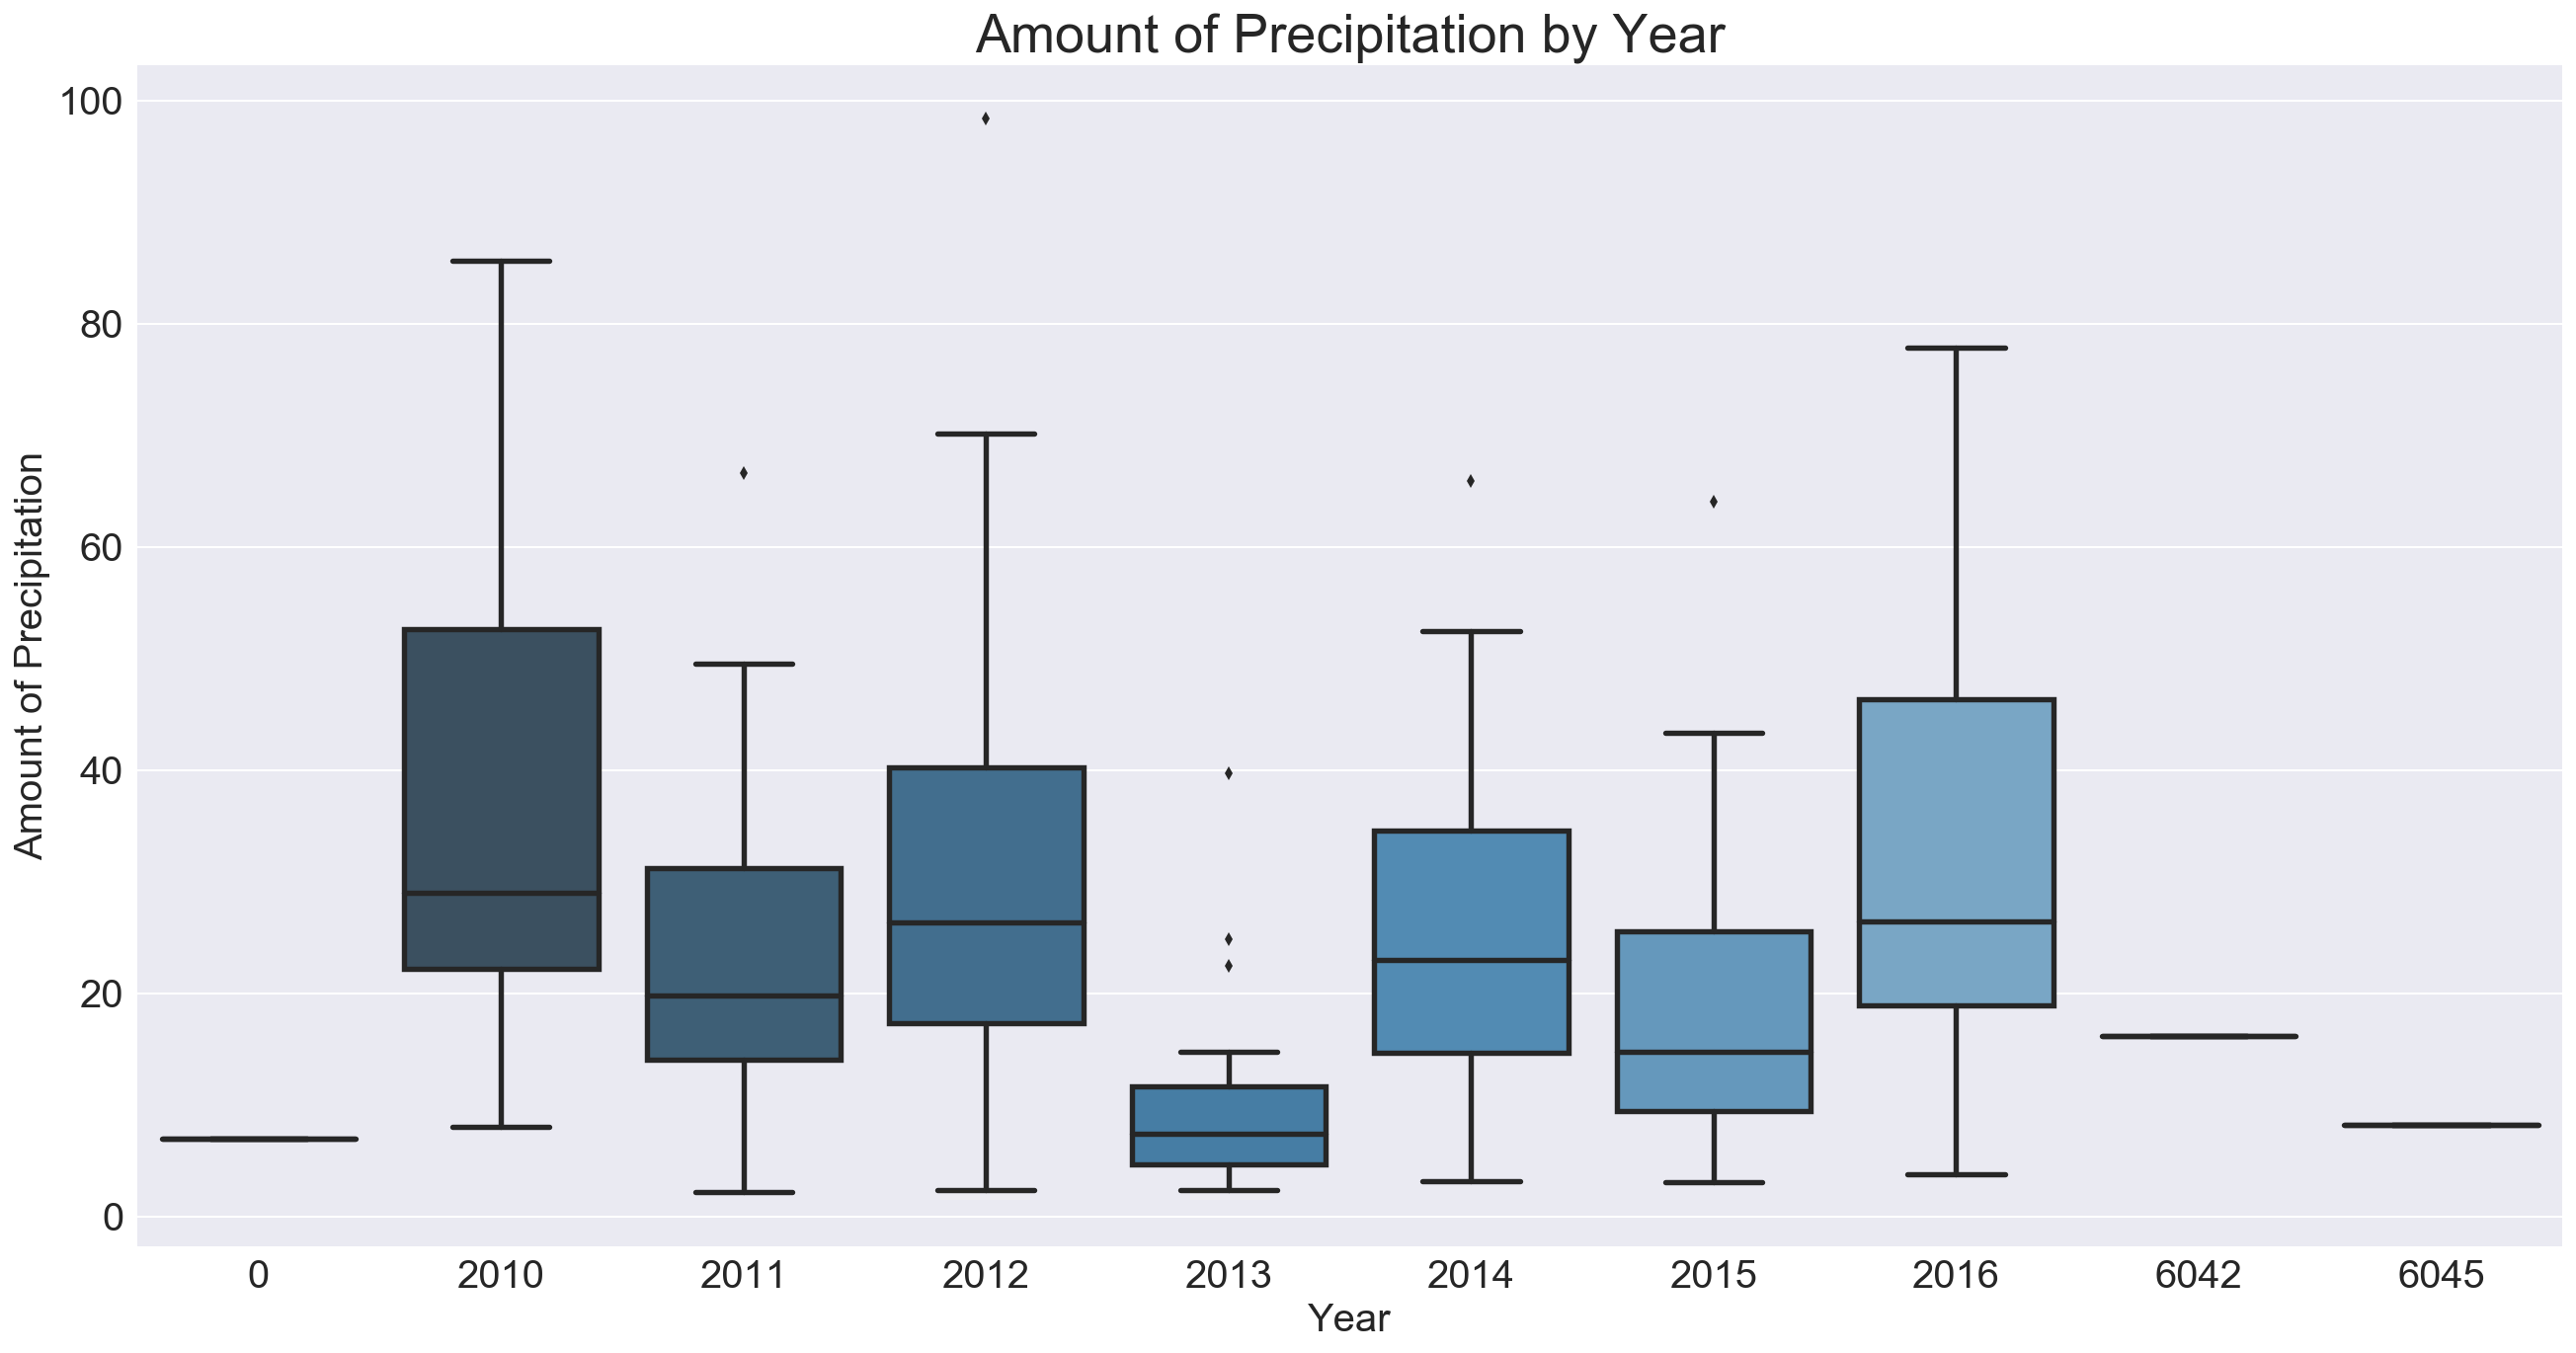

In [31]:
plt.figure(figsize=(22, 11))
sns.boxplot(x='year', y="prcp", data=df, palette="Blues_d",  linewidth=2.7);
plt.yticks(fontsize=20);
plt.xticks(fontsize=20);
plt.title('Amount of Precipitation by Year', fontsize=27)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Amount of Precipitation', fontsize=20);

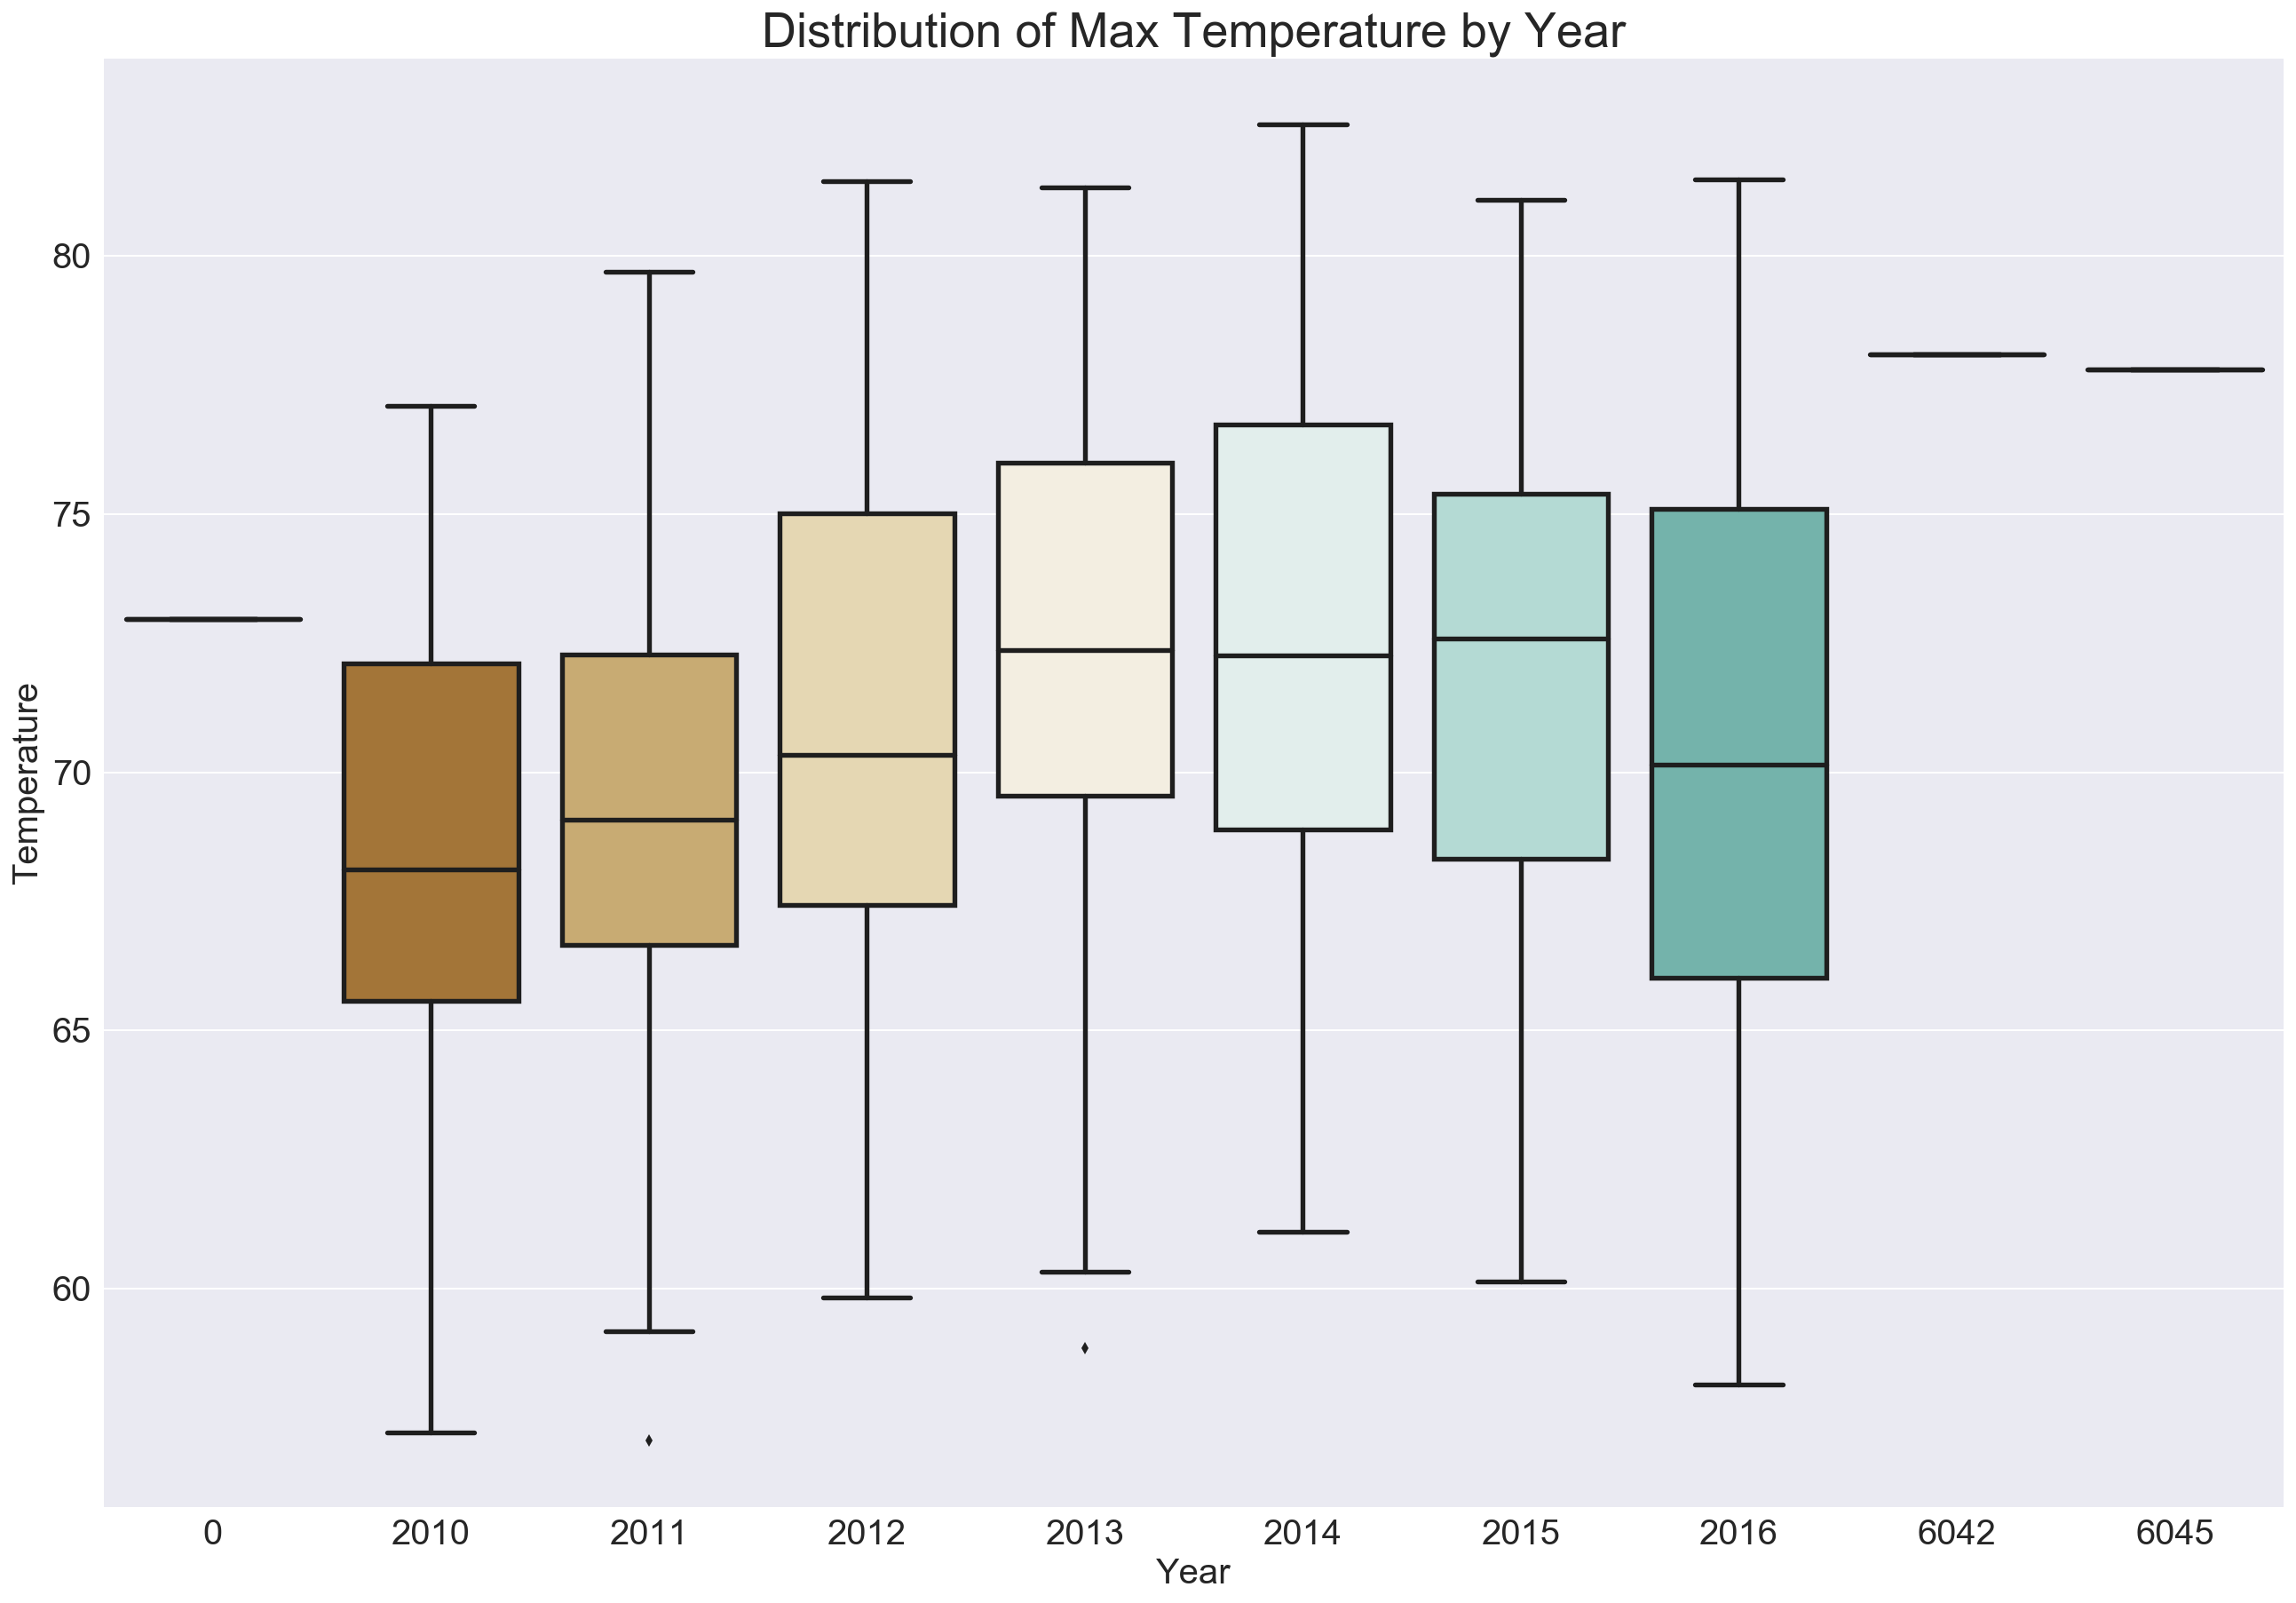

In [32]:
plt.figure(figsize=(22, 15))
sns.boxplot(x='year', y="tmax", data=df_edit, palette="BrBG",  linewidth=2.7);
plt.yticks(fontsize=20);
plt.xticks(fontsize=20);
plt.title('Distribution of Max Temperature by Year', fontsize=27)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Temperature', fontsize=20);

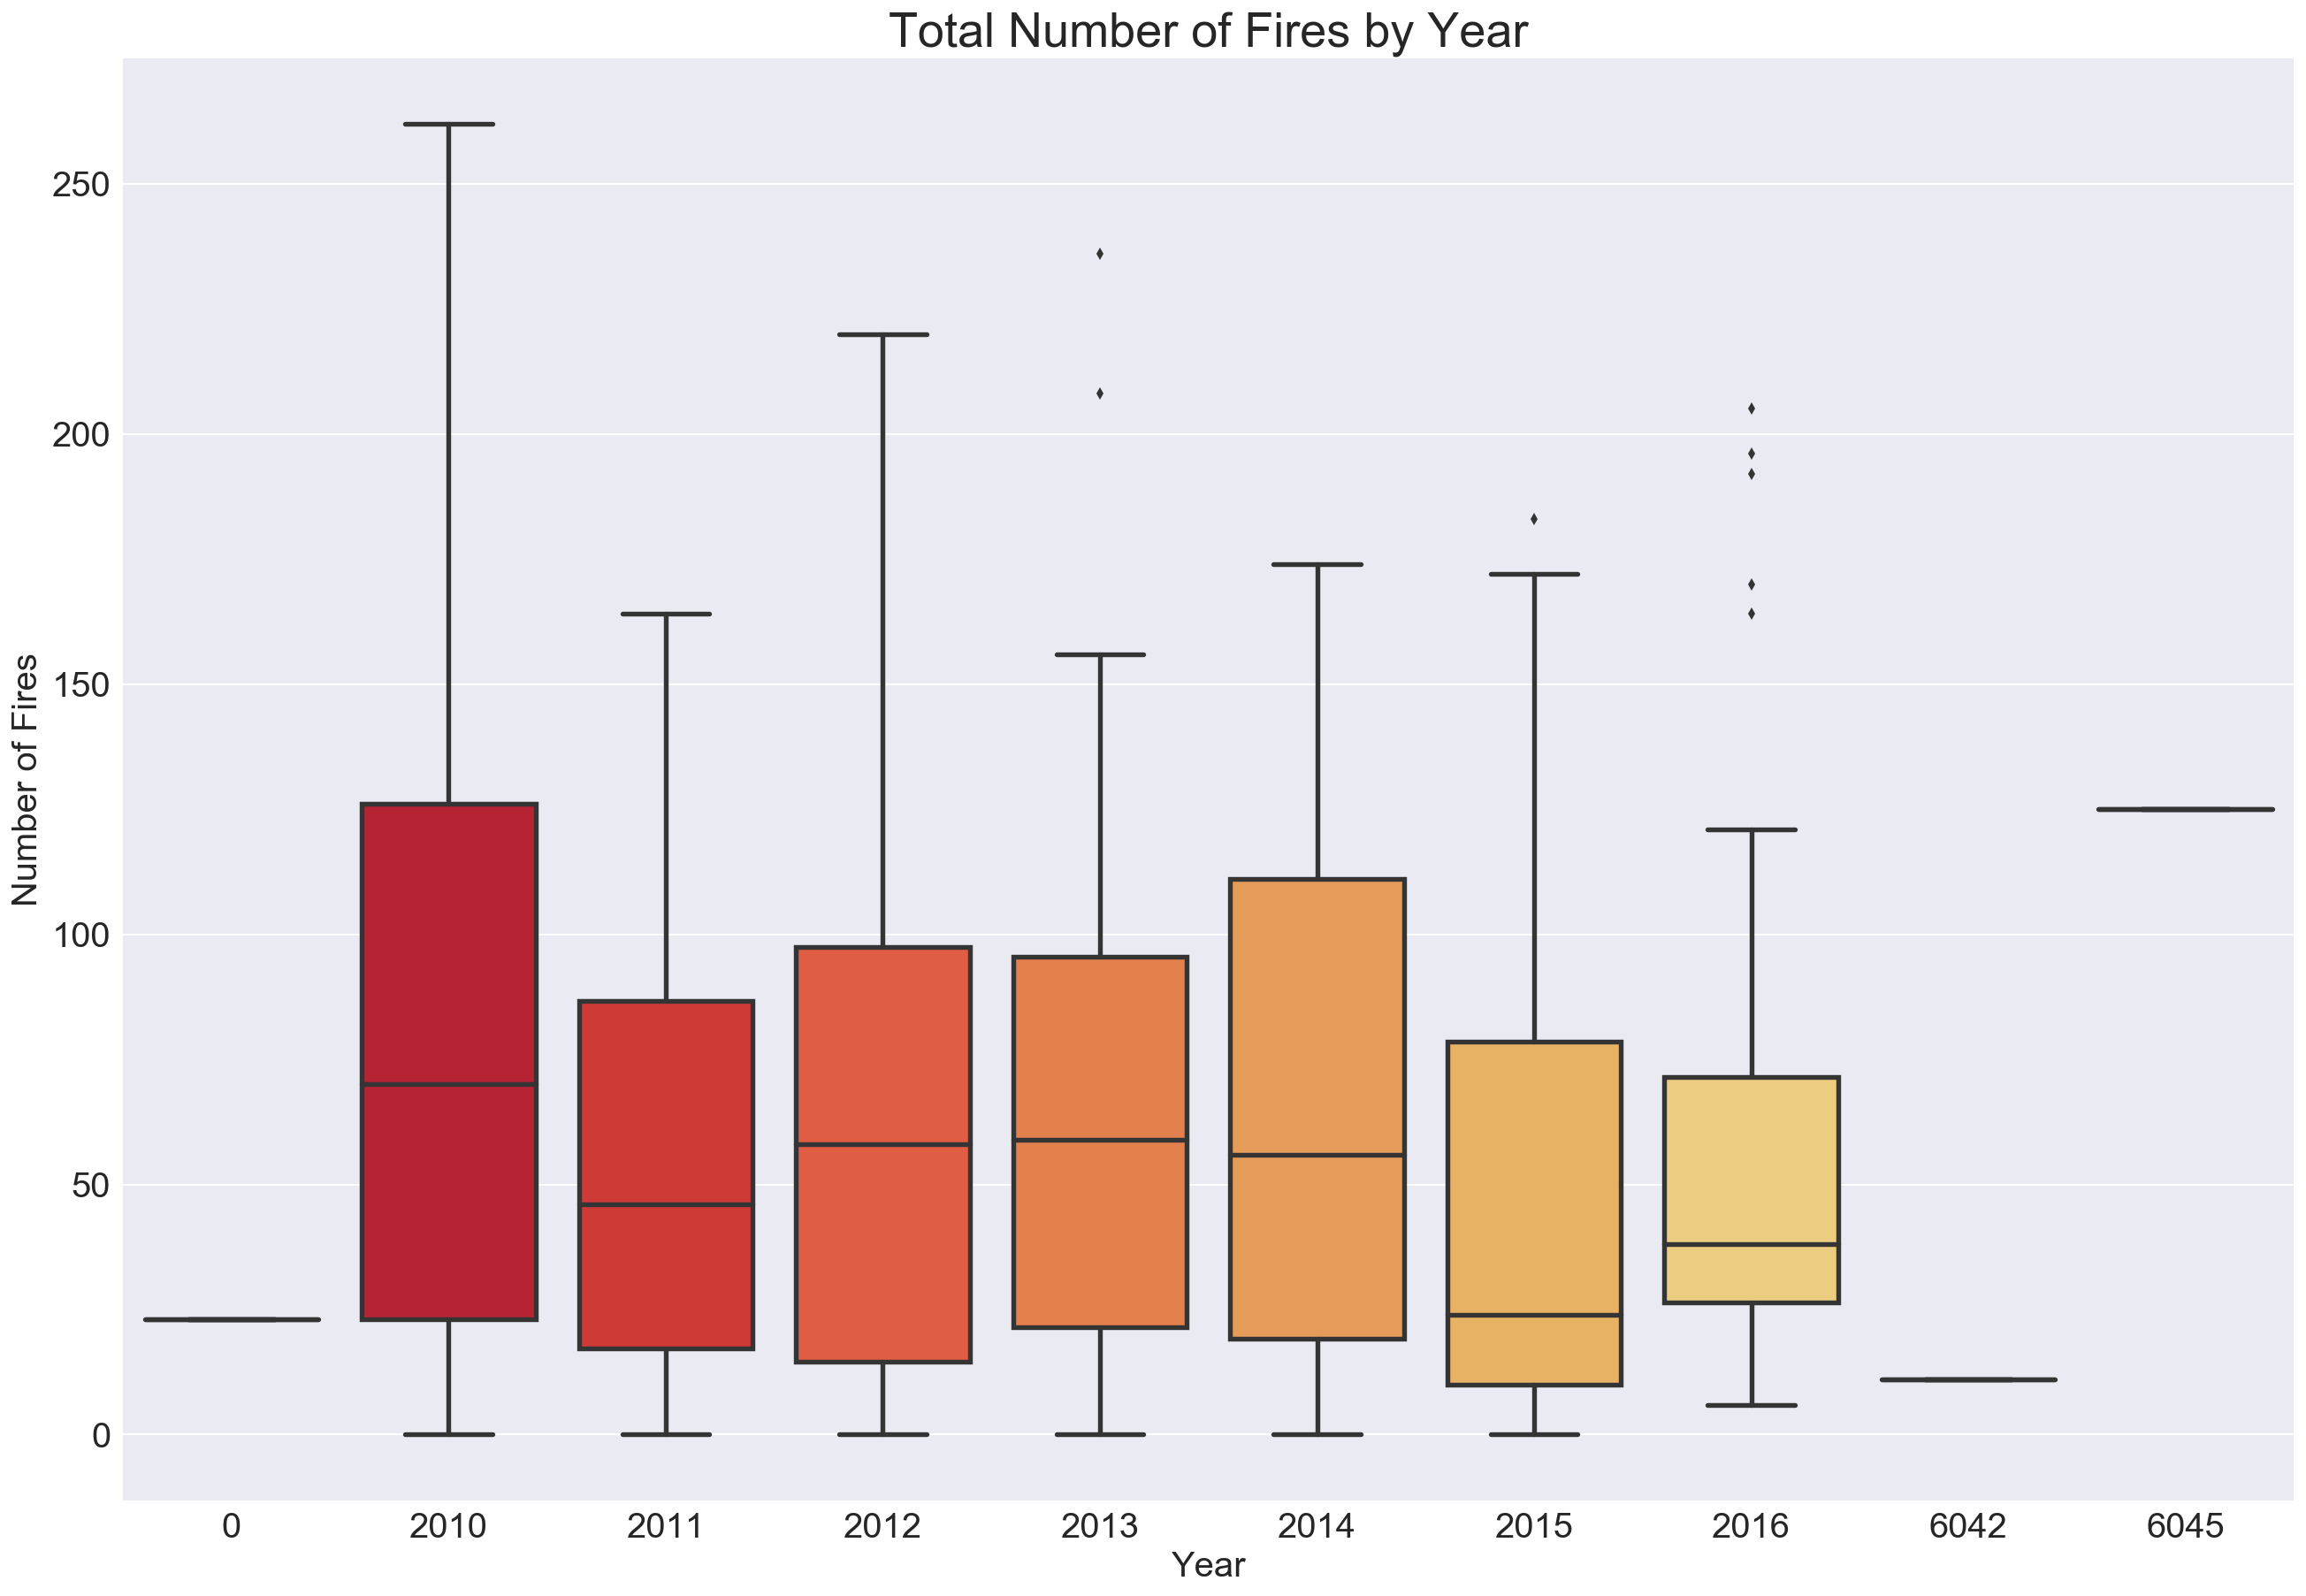

In [33]:
plt.figure(figsize=(22, 15))
sns.boxplot(x='year', y="tot_num_fire", data=df, palette="YlOrRd_r",  linewidth=2.7);
plt.yticks(fontsize=20);
plt.xticks(fontsize=20);
plt.title('Total Number of Fires by Year', fontsize=27)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Number of Fires', fontsize=20);

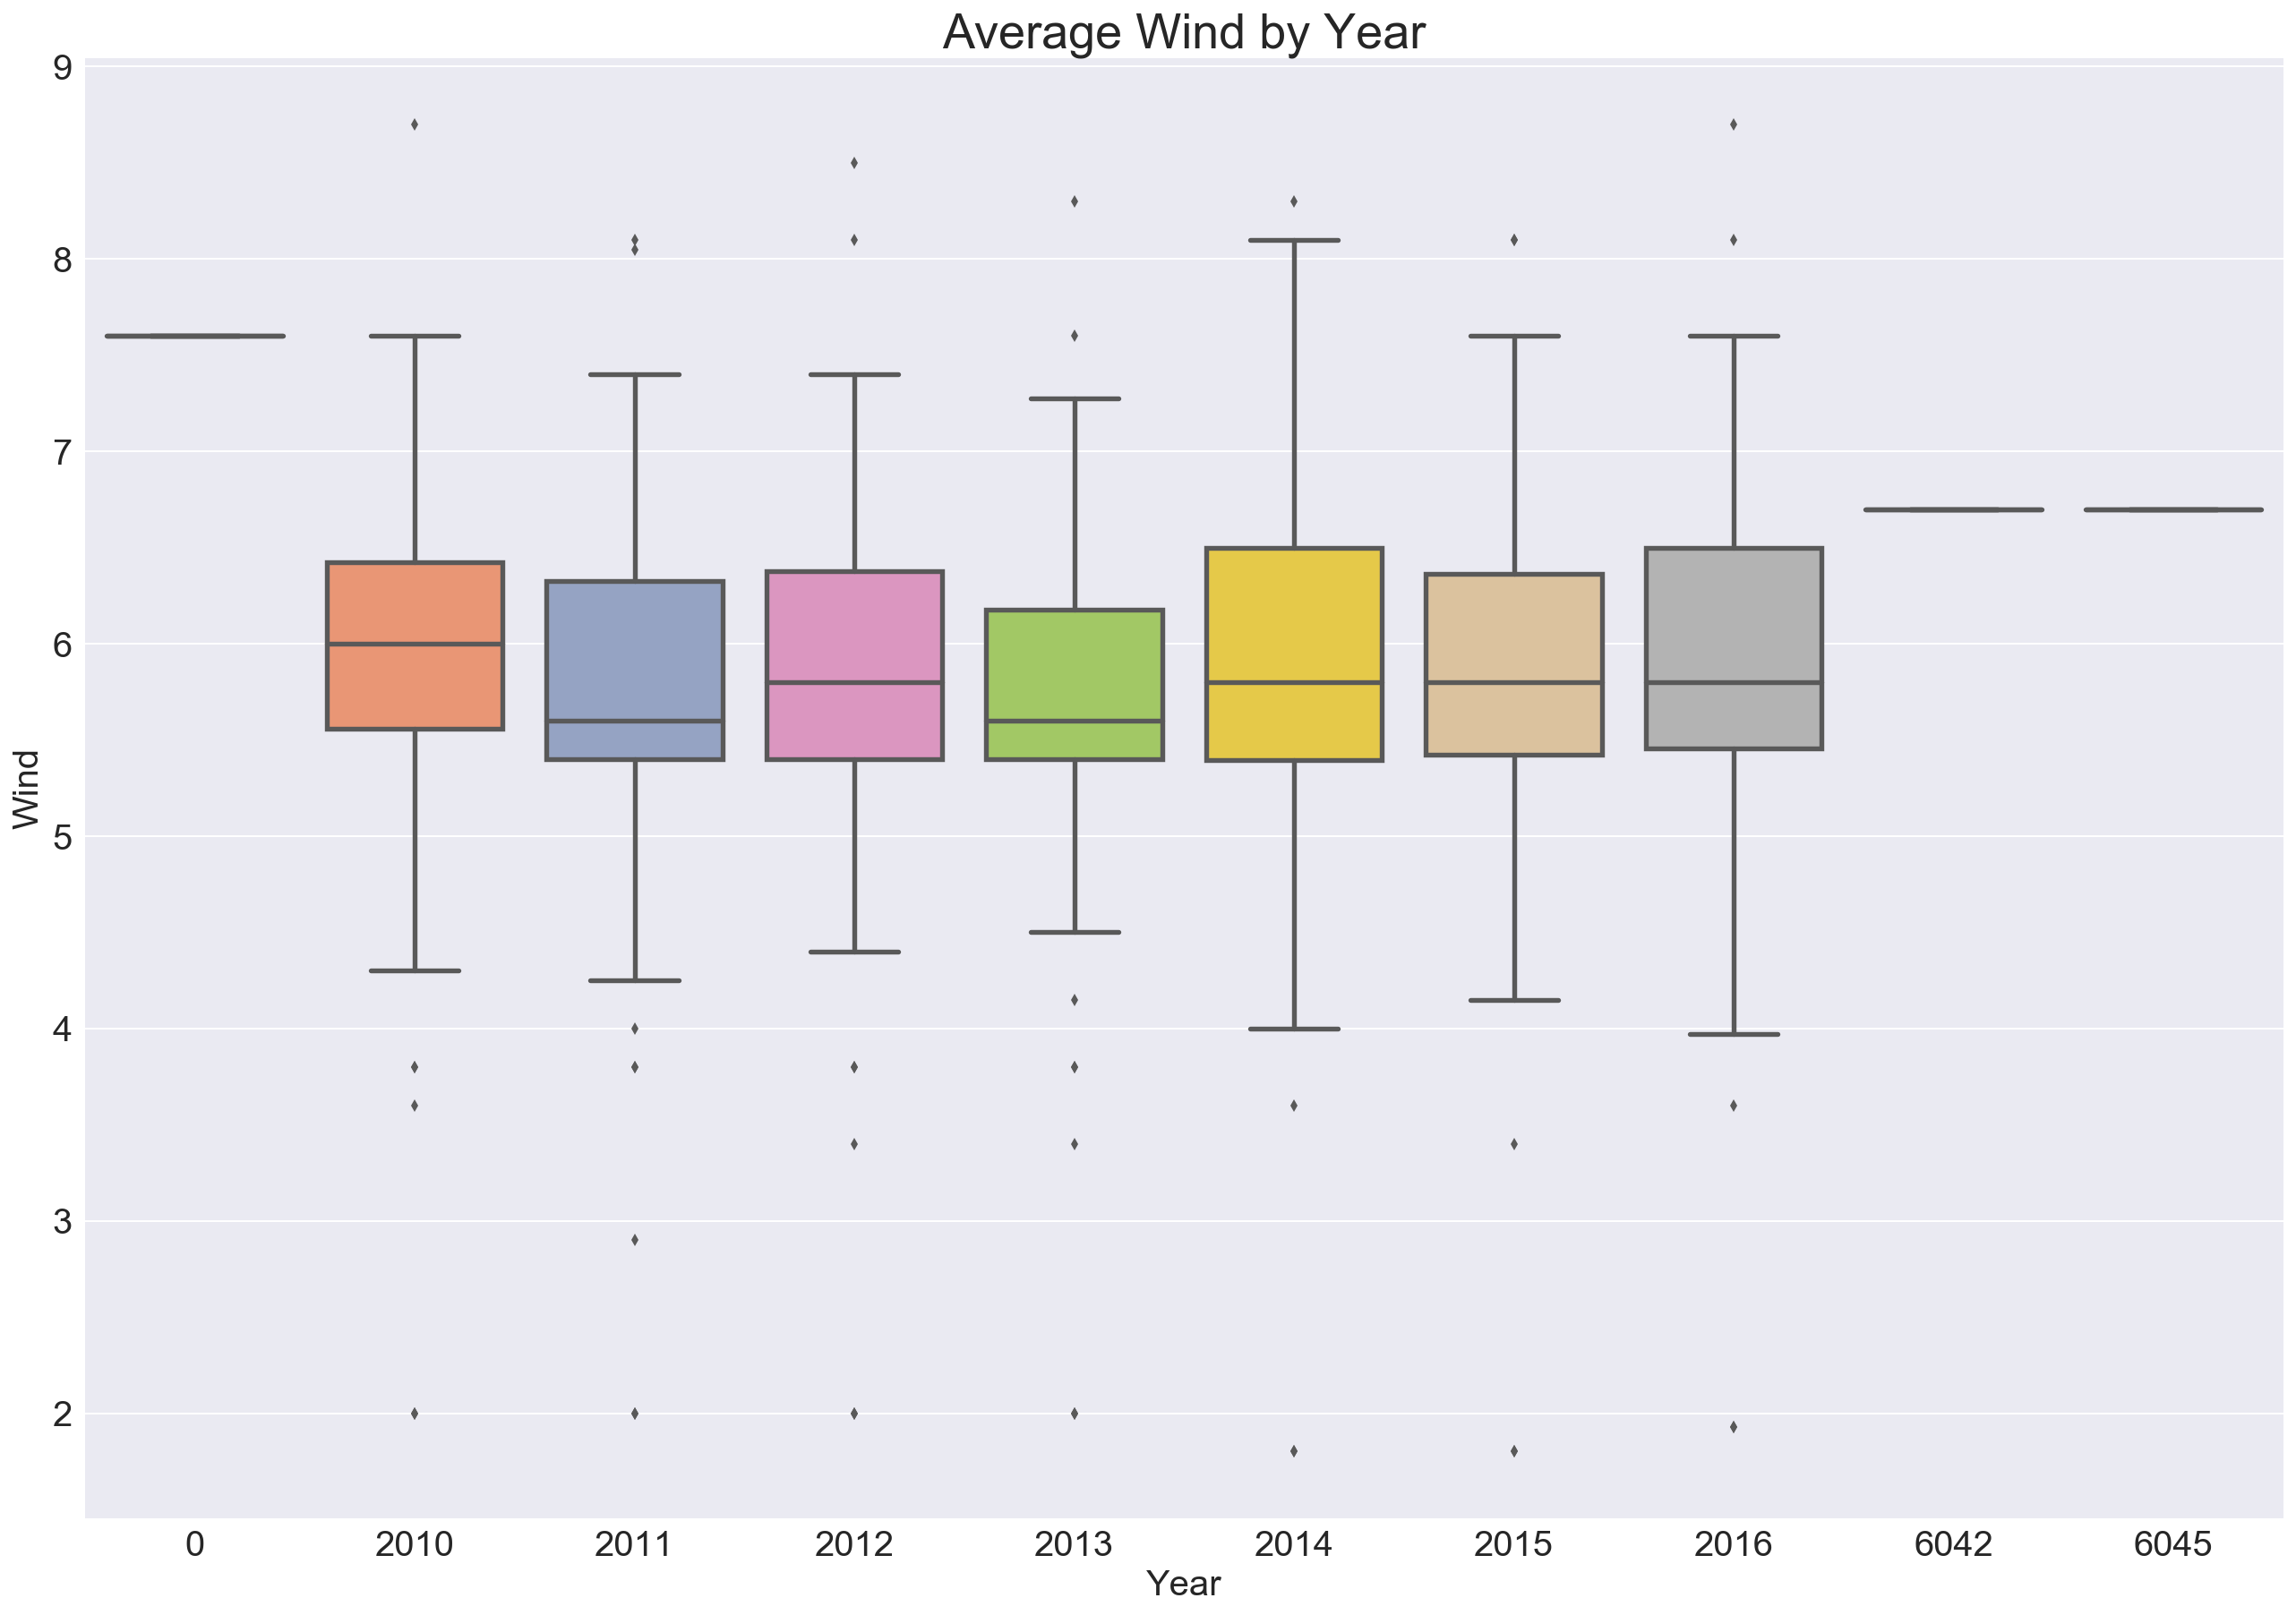

In [34]:
plt.figure(figsize=(22, 15))
sns.boxplot(x='year', y="awnd", data=df, palette="Set2",  linewidth=2.7);
plt.yticks(fontsize=20);
plt.xticks(fontsize=20);
plt.title('Average Wind by Year', fontsize=27)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Wind', fontsize=20);